#**COURS INTERACTIF: Analyse de cluster en Python**

+ *4 heures*
+ *14 Vidéos*
+ *46 exercices*
+ *46 262 participants*
+ *3 650 XP*

<img src = "https://www.datacamp.com/statement-of-accomplishment/badge/course/20d81ef2881e8be555b21fdf2e5f6b2454ba0d89.png"/>

##**Description du cours**

+ ***Vous avez probablement rencontré Google Actualités, qui regroupe automatiquement des articles d'actualité similaires sous un sujet. Vous êtes-vous déjà demandé quel processus s'exécute en arrière-plan pour arriver à ces groupes ? Dans ce cours, vous serez initié à l'apprentissage non supervisé par le clustering à l'aide de la bibliothèque SciPy en Python. Ce cours couvre le prétraitement des données et l'application du clustering hiérarchique et k-means. Tout au long du cours, vous explorerez les statistiques des joueurs d'un jeu vidéo de football populaire, FIFA 18. Après avoir terminé le cours, vous pourrez appliquer rapidement divers algorithmes de clustering sur les données, visualiser les clusters formés et analyser les résultats.***

####**1) Introduction au clustering**

+ ***Avant d'être prêt à classer les articles d'actualité, vous devez vous familiariser avec les bases du clustering. Ce chapitre vous familiarise avec une classe d'algorithmes d'apprentissage automatique appelés apprentissage non supervisé, puis vous présente le clustering, l'un des algorithmes d'apprentissage non supervisé les plus populaires. Vous connaîtrez deux techniques de clustering populaires - le clustering hiérarchique et le clustering k-means. Le chapitre se termine par des étapes de prétraitement de base avant de commencer à regrouper les données.***

|OBJECTIFS|
|---------|
Apprentissage non supervisé : les bases
Apprentissage non supervisé dans le monde réel
Observations de Pokémon
Bases de l'analyse de cluster
Observations de Pokémon : regroupement hiérarchique
Observations de Pokémon : k-means clustering
Préparation des données pour l'analyse de cluster
Normaliser les données de la liste de base
Visualisez les données normalisées
Normalisation des petits nombres
FIFA 18 : Normaliser les données

####**2) Classification hiérarchique**

+ ***Ce chapitre se concentre sur un algorithme de clustering populaire - le clustering hiérarchique - et son implémentation dans SciPy. En plus de la procédure pour effectuer un clustering hiérarchique, il tente de vous aider à répondre à une question importante : combien de clusters sont présents dans vos données ? Le chapitre se termine par une discussion sur les limites du clustering hiérarchique et discute des considérations lors de l'utilisation du clustering hiérarchique.***

|OBJECTIFS|
|---------|
Principes de base du clustering hiérarchique
Regroupement hiérarchique : méthode ward
Clustering hiérarchique : méthode unique
Clustering hiérarchique : méthode complète
Visualiser les clusters
Visualiser les clusters avec matplotlib
Visualisez les clusters avec seaborn
Combien de clusters ?
Créer un dendrogramme
Combien de clusters dans les données de comic con ?
Limites du clustering hiérarchique
Chronométrage du clustering hiérarchique
FIFA 18 : explorer les défenseurs

####**3) Clustering K-Means**

+ ***Ce chapitre présente un algorithme de clustering différent - k-means clustering - et son implémentation dans SciPy. Le clustering K-means surmonte le plus grand inconvénient du clustering hiérarchique qui a été discuté dans le dernier chapitre. Comme les dendrogrammes sont spécifiques au clustering hiérarchique, ce chapitre présente une méthode pour trouver le nombre de clusters avant d'exécuter le clustering k-means. Le chapitre se termine par une discussion sur les limites du clustering k-means et discute des considérations lors de l'utilisation de cet algorithme.***

|OBJECTIFS|
|---------|
Principes de base du clustering k-means
K-means clustering : premier exercice
Exécution du clustering k-means
Combien de clusters ?
Méthode du coude sur des grappes distinctes
Méthode du coude sur des données uniformes
Limites du clustering k-means
Impact des semences sur des clusters distincts
Modèles de regroupement uniformes
FIFA 18 : les défenseurs revisités

####**4) Clustering dans le monde réel**

+ ***Maintenant que vous êtes familiarisé avec deux des techniques de clustering les plus populaires, ce chapitre vous aide à appliquer ces connaissances à des problèmes du monde réel. Le chapitre traite d'abord du processus de recherche des couleurs dominantes dans une image, avant de passer au problème abordé dans l'introduction - le regroupement d'articles de presse. Le chapitre se termine par une discussion sur le regroupement avec plusieurs variables, ce qui rend difficile la visualisation de toutes les données.***

|OBJECTIFS|
|---------|
Couleurs dominantes dans les images
Extraire les valeurs RVB de l'image
Combien de couleurs dominantes ?
Afficher les couleurs dominantes
Regroupement de documents
TF-IDF d'intrigues de films
Principaux termes dans les clusters de films
Clustering avec plusieurs fonctionnalités
Clustering avec de nombreuses fonctionnalités
Vérifications de base sur les clusters
FIFA 18 : qu'est-ce qui fait un joueur complet ?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


####**1. Apprentissage non supervisé : bases**

+ ***Salut tout le monde! Bienvenue dans la vidéo de ce cours. Dans cette vidéo, nous nous concentrerons sur l'apprentissage non supervisé, les problèmes commerciaux résolus à l'aide de ces techniques et le traçage de base des points qui nous aideraient plus tard dans le cours ! Commençons.***

####**2. Exemple quotidien : les actualités Google**

+ ***En parcourant Google Actualités, vous êtes-vous demandé ce qui se cache derrière le regroupement d'actualités ? Comment l'algorithme détermine-t-il quels articles sont similaires ? C'est le résultat d'un algorithme d'apprentissage non supervisé. Il parcourt le texte de chaque article et, en fonction des termes fréquemment rencontrés, regroupe les articles. Le groupe d'articles présenté ici est basé sur l'équipe indienne de cricket. Grâce à ce cours, vous serez initié à diverses techniques de clustering. Semblable à cet exemple, vous effectuerez également un regroupement de documents sur du texte.***

####**3. Données étiquetées et non étiquetées**

+ ***Avant de définir l'apprentissage non supervisé, essayons de comprendre les termes : données étiquetées et non étiquetées. Imaginez que vous ayez une liste de points avec des coordonnées $X$ et $Y$. Si seules les coordonnées des points sont disponibles et qu'aucune autre caractéristique n'est disponible pour distinguer les points de données, on parle de données non étiquetées. Dans le même temps, si nous associons au préalable chaque point de données à un groupe, disons des zones normales et dangereuses, nous l'appelons des données étiquetées.***

####**4. Qu'est-ce que l'apprentissage non supervisé ?**

+ ***Qu'est-ce que l'apprentissage non supervisé ? C'est un terme générique pour un groupe d'algorithmes d'apprentissage automatique qui sont utilisés pour trouver des modèles. Les données utilisées dans ces algorithmes ne sont pas étiquetées, classées ou caractérisées avant l'exécution de l'algorithme. L'algorithme est exécuté, par conséquent, pour trouver et expliquer les structures inhérentes au sein des données. Les algorithmes d'apprentissage non supervisés courants sont le clustering, les détections d'anomalies et les réseaux de neurones. Le clustering est utilisé pour regrouper des points de données similaires.***

####**5. Qu'est-ce que le regroupement ?**

+ ***Passons maintenant à une classe spécifique d'algorithmes d'apprentissage non supervisé. Le clustering est le processus de regroupement d'éléments ayant des caractéristiques similaires. Les groupes ainsi formés sont tels que les éléments d'un même groupe sont plus proches les uns des autres en termes de certaines caractéristiques par rapport aux éléments d'autres groupes. Le clustering appartient au groupe des algorithmes d'apprentissage non supervisé car les données ne sont pas étiquetées, regroupées ou caractérisées au préalable. Un exemple simple pour démontrer le regroupement serait de regrouper des points sur un plan 2D en fonction de leur distance. Essayons de le visualiser en Python.***

####**6. Tracer les données pour le regroupement - Observations de Pokemon**

+ ***Pour faire un nuage de points, nous allons utiliser la classe pyplot de la bibliothèque matplotlib en Python. Nous tracerons les observations de Pokemon dans un parc sous forme de coordonnées. La première étape consiste donc à importer la classe requise en tant que plt. Ensuite, nous définissons les coordonnées des points à tracer dans deux listes - une pour les coordonnées x et y. Dans ce cas, nous avons quinze observations que nous aimerions tracer. Enfin, nous utilisons la méthode scatter de la classe pyplot, avec les listes pour les coordonnées comme arguments et la méthode plot pour afficher le tracé. Voyons à quoi ressemble l'intrigue.***

####**7. Tracer les données pour le clustering - le nuage de points**

+ ***Voici à quoi ressemble l'intrigue. En tant qu'analyse préliminaire avant d'effectuer toute analyse de clustering sur les points, la visualisation vous aide à comprendre combien de clusters naturels sont présents dans les données.***

####**8. Tracer les données pour le clustering - clusters**

+ ***Il y a trois clusters dans les données, qui sont mis en évidence dans le tracé. En visualisant ces données, vous pouvez déduire avec une certaine confiance où se trouvent réellement les Pokémon !***

####**9. À suivre - un peu d'entraînement**

+ ***Bien qu'il s'agisse d'un cas simplifié, les problèmes de la vie réelle peuvent ne pas avoir de solution évidente et vous devrez peut-être effectuer une analyse plus approfondie pour déchiffrer le nombre réel de clusters, ce que vous apprendrez plus tard dans le cours. Il est temps de faire quelques exercices basés sur cette vidéo.***

###**EXERCICES**

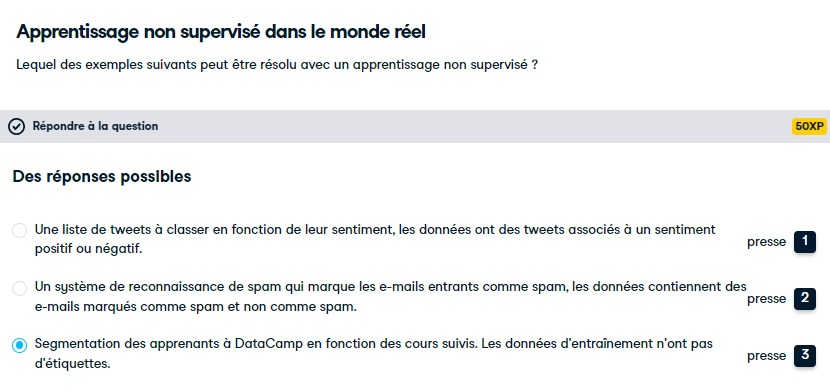

***C'est exact ! Comme les données d'apprentissage n'ont pas d'étiquettes, un algorithme non supervisé doit être utilisé pour comprendre les modèles dans les données.***

####**Observations de Pokémon**
+ ***Il y a eu des rapports d'observations de Pokémon rares et légendaires. On vous a demandé d'enquêter ! Tracez les coordonnées des observations pour savoir où se trouve le Pokémon. Les coordonnées $X$ et $Y$ des points sont stockées dans list $x$ et $y$, respectivement.***

####**Instructions**

+ Importez la classe pyplot de matplotlib la bibliothèque en tant que plt.
+ Créez un nuage de points à l'aide de la classe pyplot.
+ Affichez le nuage de points créé à l'étape précédente.

In [2]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

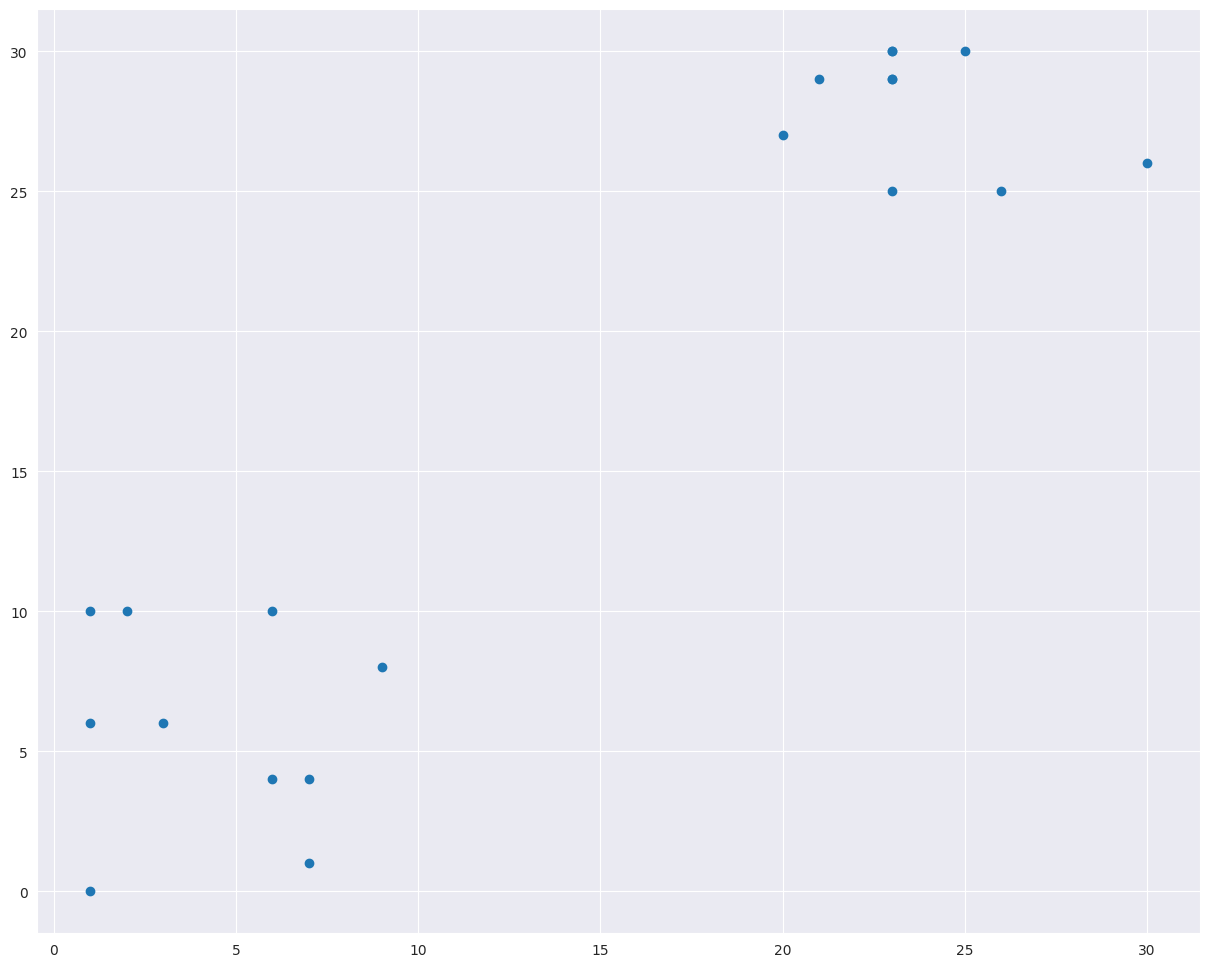

In [3]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.figure(figsize=(15,12))
plt.scatter(x, y)

# Display the scatter plot
plt.show()

***C'est exact ! Remarquez les zones où les observations sont denses. Cela indique qu'il n'y a pas un, mais deux Pokémon légendaires !***

####**1. Principes de base de l'analyse par grappes**

+ ***Bonjour à tous! Maintenant que vous êtes familiarisé avec l'apprentissage non supervisé, passons aux bases de l'analyse par grappes.***

####**2. Qu'est-ce qu'un cluster ?**

+ ***Tout d'abord, définissons un cluster. Il s'agit d'un groupe d'éléments ayant des caractéristiques similaires. Dans l'exemple de Google Actualités, un groupe d'articles d'actualité contient des mots et des associations de mots similaires. Un autre exemple de regroupement est la segmentation des clients en fonction de leurs habitudes de consommation. Un groupe de clients présenterait des habitudes de dépenses similaires.***

####**3. Algorithmes de clustering**

+ ***Bien qu'il existe d'autres algorithmes comme la technique DBSCAN basée sur la densité ou les modèles gaussiens pour l'analyse de clusters, ce cours se concentrera uniquement sur les deux techniques les plus courantes - le clustering hiérarchique et k-means.***

####**4. Algorithme de clustering hiérarchique : étape 1**

+ ***Examinons les étapes du clustering hiérarchique avant la mise en œuvre. A des fins de démonstration, considérons 13 points sur un plan 2D.***

####**5. Algorithme de clustering hiérarchique : étape 2**

+ ***Dans la première étape, tous les points sont considérés comme des clusters individuels. Un centre de cluster est une moyenne des attributs de tous les points de données d'un cluster. Dans ce cas, les centres de cluster auront deux attributs - la moyenne des coordonnées $x$ et $y$. A ce stade, les centres de cluster de tous les clusters sont les coordonnées des points individuels.***

####**6. Algorithme de clustering hiérarchique : étape 3**

+ ***Ensuite, les distances entre toutes les paires de centres de cluster sont calculées et les deux clusters les plus proches sont fusionnés. Le centre de cluster du cluster fusionné est alors recalculé. Dans l'exemple, deux clusters en bas à gauche ont été fusionnés. A cette étape, il nous reste 12 clusters, un de moins que nous avons commencé.***

####**7. Algorithme de clustering hiérarchique : étape 4**

+ ***Dans la deuxième étape, les clusters avec les centres de cluster les plus proches sont fusionnés en haut à gauche. Ce processus de fusion des deux clusters les plus proches se poursuit jusqu'à ce que nous arrivions aux clusters souhaités. A chaque étape, le nombre de clusters diminue de un. Comme le montre la répartition des points, arrêtons-nous à trois clusters.***

####**8. Algorithme de clustering hiérarchique : étape 5**

+ ***Enfin, ce sont trois clusters auxquels vous arrivez après l'exécution de l'algorithme. Voyons maintenant sa simple implémentation dans SciPy.***

####**9. Regroupement hiérarchique dans SciPy**

+ ***Les méthodes requises pour le clustering hiérarchique, la liaison et le fcluster sont stockées dans `scipy.cluster.hierarchy`. Nous explorerons les paramètres de ces méthodes plus tard dans le cours. Nous importons également pyplot et seaborn pour la visualisation et pandas pour la manipulation des données. Une liste de quinze points avec des coordonnées $x$ et $y$ est stockée dans un DataFrame. Premièrement, la méthode de liaison calcule les distances entre les clusters intermédiaires. Ensuite, la méthode fcluster génère des clusters et attribue des étiquettes de cluster associées à une nouvelle colonne dans le DataFrame. Enfin, nous traçons les points en utilisant seaborn avec les étiquettes de cluster comme argument de teinte pour associer des clusters de différentes couleurs.***

####**10. Résultats du clustering hiérarchique**

+ ***Voici le résultat du nuage de points marin, montrant les trois clusters.***

11. Algorithme de clustering K-means : Partie 1
00:00 - 00:00
Ensuite, nous discutons de l'algorithme de clustering k-means avec le même ensemble de points pour créer trois clusters.

####**12. Algorithme de clustering K-means : partie 2**

+ ***Tout d'abord, un centre de cluster aléatoire est généré pour chacun des trois clusters.***

####**13. Algorithme de clustering K-means : Partie 3**

+ ***Ensuite, la distance à ces centres de cluster est calculée pour chaque point à affecter au cluster le plus proche.***

####**14. Algorithme de clustering K-means : Partie 4**

+ ***Les centres des clusters sont recalculés. Cette itération d'attribution de points aux centres de cluster recalculés est effectuée un nombre de fois prédéfini. Ici, les clusters ont été formés dans la première itération.***

####**15. Regroupement K-means dans SciPy**

+ ***Le clustering K-means est implémenté à l'aide des méthodes `kmeans et vq` de `scipy.cluster.vq`. Les centres de gravité des clusters sont calculés à l'aide de kmeans et les affectations de cluster pour chaque point sont effectuées via `vq`. Le deuxième argument dans les deux méthodes est la distorsion, que nous capturons dans une variable fictive. Nous explorerons les paramètres de ces méthodes plus tard dans le cours. Enfin, nous traçons les clusters à l'aide de seaborn.***

####**16. K-means résultats de regroupement**

+ ***Voici le tracé obtenu.***

####**17. Ensuite : exercices pratiques**

+ ***Essayons quelques exercices maintenant.***


###**EXERCICES**
####**Observations de Pokémon : regroupement hiérarchique**

+ ***Nous allons poursuivre l'enquête sur les observations de Pokémon légendaires de l'exercice précédent. N'oubliez pas que dans le nuage de points de l'exercice précédent, vous avez identifié deux zones où les observations de Pokémon étaient denses. Cela signifie que les points semblent se séparer en deux groupes. Dans cet exercice, vous formerez deux clusters d'observations en utilisant le clustering hiérarchique.***

+ *'$x$'et '$y$' sont des colonnes de coordonnées $X$ et $Y$ des emplacements des observations, stockées dans un pandas DataFrame, df. Les éléments suivants peuvent être utilisés : matplotlib.pyplotas plt, seabornas snset pandasas pd.*

####**Instructions**

+ Importez les bibliothèques linkage et fcluster.
+ Utilisez la fonction linkage() pour calculer les distances à l'aide de la méthode des quartiers.
+ Générez des étiquettes de cluster pour chaque point de données avec deux clusters à l'aide de la fonction fcluster().
+ Tracez les points avec seaborn et attribuez une couleur différente à chaque cluster.

In [4]:
df = pd.DataFrame({'x': x, 'y': y})

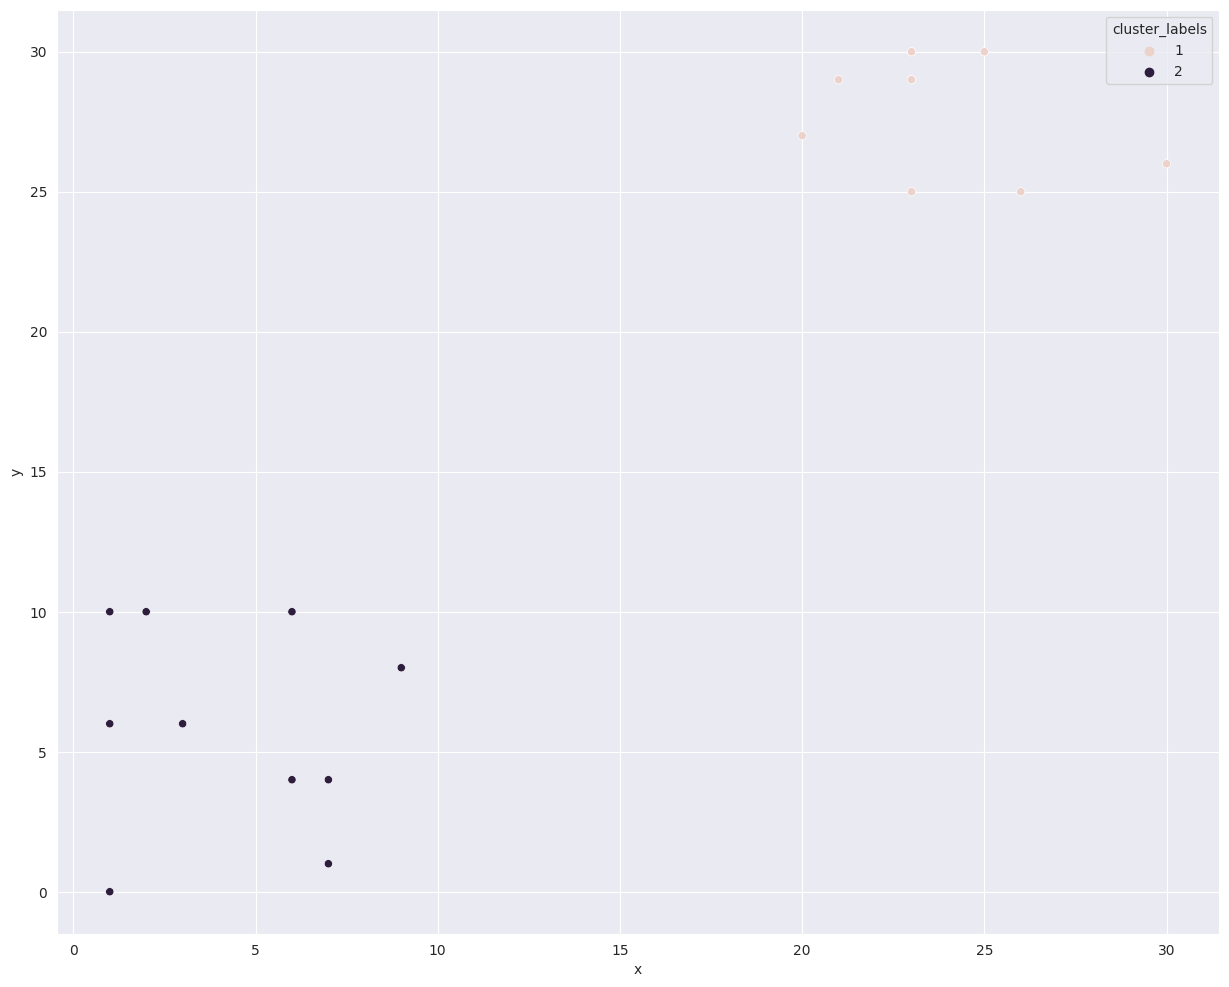

In [5]:
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
plt.figure(figsize=(15,12))
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

***Vous avez raison! Notez que les étiquettes de cluster sont tracées avec des couleurs différentes.***

####**Observations de Pokémon : k-means clustering**

+ ***Nous allons poursuivre l'enquête sur les observations de Pokémon légendaires de l'exercice précédent. Tout comme l'exercice précédent, nous utiliserons le même exemple d'observations de Pokémon. Dans cet exercice, vous formerez des groupes d'observations en utilisant le regroupement k-means.***

+ *$x$ et $y$ sont des colonnes de coordonnées $X$ et $Y$ des emplacements des observations, stockées dans un pandas DataFrame, df. Les éléments suivants peuvent être utilisés : matplotlib.pyplotas plt, seabornas snset pandasas pd.*

####**Instructions**

+ Importez les fonctions kmeans et vq.
+ Utilisez la fonction kmeans() pour calculer les centres de cluster en définissant deux clusters.
+ Attribuez des étiquettes de cluster à chaque point de données à l'aide de la fonction vq().
+ Tracez les points avec seaborn et attribuez une couleur différente à chaque cluster

In [6]:
df = df.astype('float')

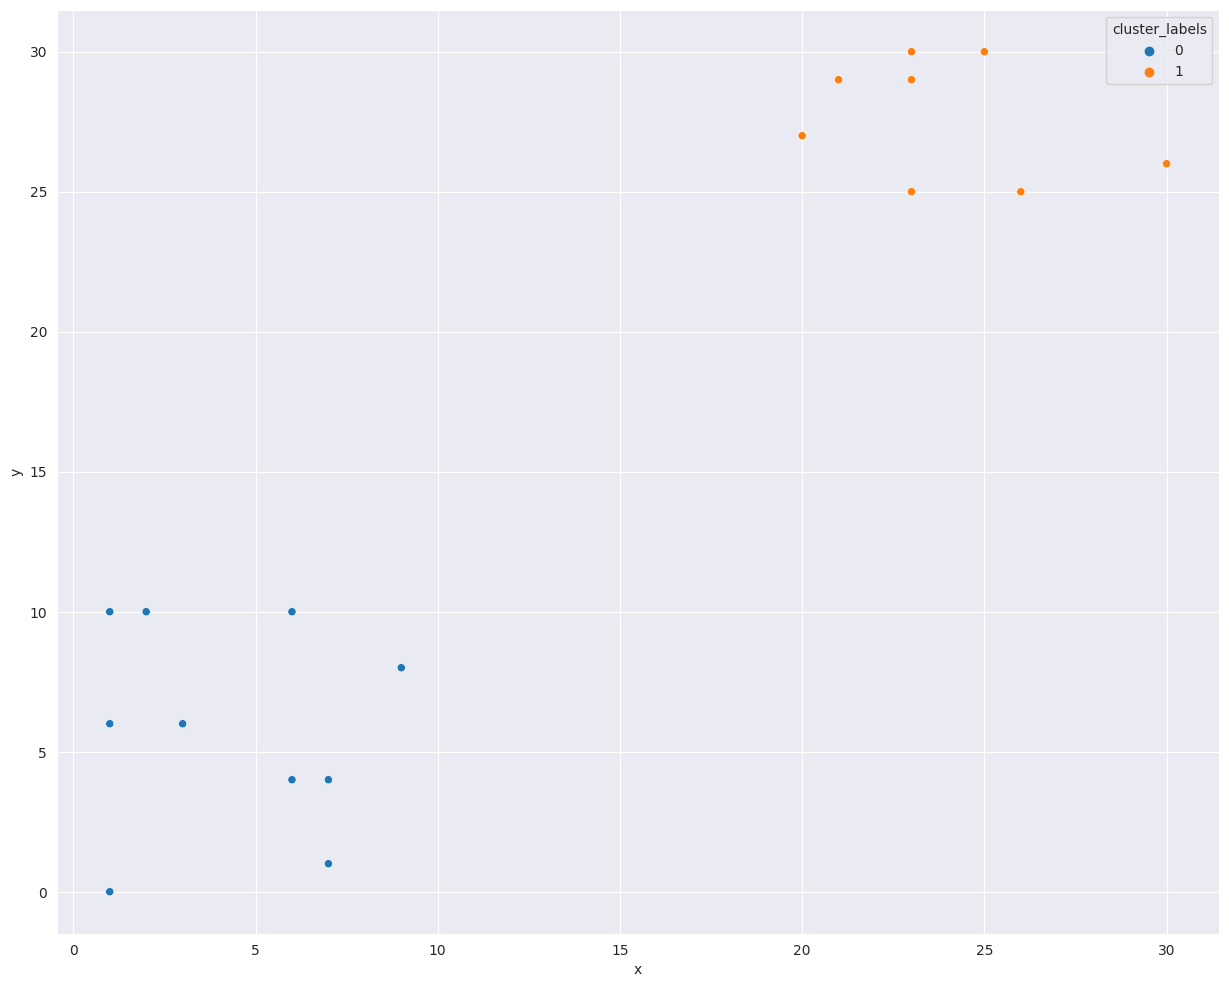

In [7]:
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
plt.figure(figsize=(15,12))
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()

***Vous avez raison! Notez que dans ce cas, les résultats des deux types de clustering sont similaires. Nous examinerons des résultats nettement différents plus tard dans le cours.***

####**1. Préparation des données pour l'analyse par grappes**

+ ***Bonjour à tous. Maintenant que vous êtes familiarisé avec les deux techniques de clustering de base, discutons d'une étape importante du traitement des données que nous devons appliquer avant d'effectuer le clustering.**

####**2. Pourquoi devons-nous préparer les données pour le regroupement ?**

+ ***Pourquoi devons-nous préparer les données pour le clustering ? Imaginez une situation où vous avez un ensemble de variables avec des unités incomparables - telles que les dimensions d'un produit et son prix. Même si les variables ont la même unité, elles peuvent être significativement différentes en termes d'échelles et de variances. Par exemple, le montant que l'on peut dépenser pour un article peu coûteux comme les céréales est faible par rapport aux frais de déplacement. Si nous utilisons des données sous cette forme brute, les résultats du regroupement peuvent être biaisés. Les grappes formées peuvent dépendre d'une variable beaucoup plus que l'autre. Comment rendons-nous compte de ces problèmes, alors? Nous utilisons un processus appelé normalisation.***

####**3. Normalisation des données**

+ ***Qu'est-ce que la normalisation des données ? C'est un processus par lequel nous remettons à l'échelle les valeurs d'une variable par rapport à l'écart type des données. L'écart type résultant après la normalisation est de 1. Le processus de normalisation est simple et obtenu en divisant une valeur par son écart type. Regardons son implémentation en Python. Une bibliothèque de normalisation est disponible sur le package SciPy, en utilisant la méthode whiten de la classe vq. Tout d'abord, nous initions les données à normaliser dans une liste, puis utilisons la méthode de blanchiment pour les transformer. Le réseau peut être unidimensionnel ou multidimensionnel. Notez que, dans l'exemple, nous utilisons une liste unidimensionnelle. Dans le cas d'un tableau multidimensionnel ou d'une liste de listes, whiten divise chaque valeur par l'écart type de la colonne. Le résultat de la méthode de blanchiment est un tableau de mêmes dimensions.***

####**4. Illustration : normalisation des données**

+ ***Regardons un graphique utilisant la bibliothèque matplotlib en Python pour comparer les résultats du processus de normalisation. Tout d'abord, vous devez importer la classe pyplot de la bibliothèque matplotlib en Python. Nous avons initialisé les deux listes qui contiennent les points de données d'origine et mis à l'échelle. Par défaut, pyplot trace des graphiques linéaires. Ensuite, nous activons la légende dans le graphique, puis affichons le tracé. Voyons à quoi ressemble l'intrigue. Les listes originales et mises à l'échelle ont été tracées respectivement en bleu et en orange. Le numéro de série des points se trouve sur l'axe des x, tandis que la valeur des points de données d'origine et mis à l'échelle se trouve sur l'axe des y. Comme vous pouvez le constater, la variation des données mises à l'échelle a été atténuée par rapport aux données d'origine. Fait intéressant, les tendances restent similaires aux données d'origine.***

####**5. Ensuite : quelques exercices de bricolage**

+ ***Avec cela, nous arrivons à la fin de cette démonstration. Il est temps pour vous de vous familiariser avec le processus de normalisation en écrivant votre propre code.***

###**EXERCICES**

####**Normaliser les données de la liste de base**
+ ***Maintenant que vous êtes au courant de la normalisation, essayons de normaliser certaines données. goals_forest une liste de buts marqués par une équipe de football lors de ses dix derniers matchs. Normalisons les données à l'aide de la fonction whiten().***

####**Instructions**

+ Importez la fonction whiten.
+ Utilisez la fonction whiten() pour normaliser les données.

In [8]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


***C'est vrai! Notez que les valeurs mises à l'échelle présentent moins de variations. Vous allez maintenant visualiser les données dans le prochain exercice.***

####**Visualisez les données normalisées**

+ ***Après avoir normalisé vos données, vous pouvez comparer les données mises à l'échelle aux données d'origine pour voir la différence. Les variables du dernier exercice goals_foret scaled_data sont déjà à votre disposition.***

####**Instructions**

+ Utilisez la bibliothèque matplotlib pour tracer les données d'origine et mises à l'échelle.
+ Afficher la légende dans le tracé.
+ Affichez le tracé.

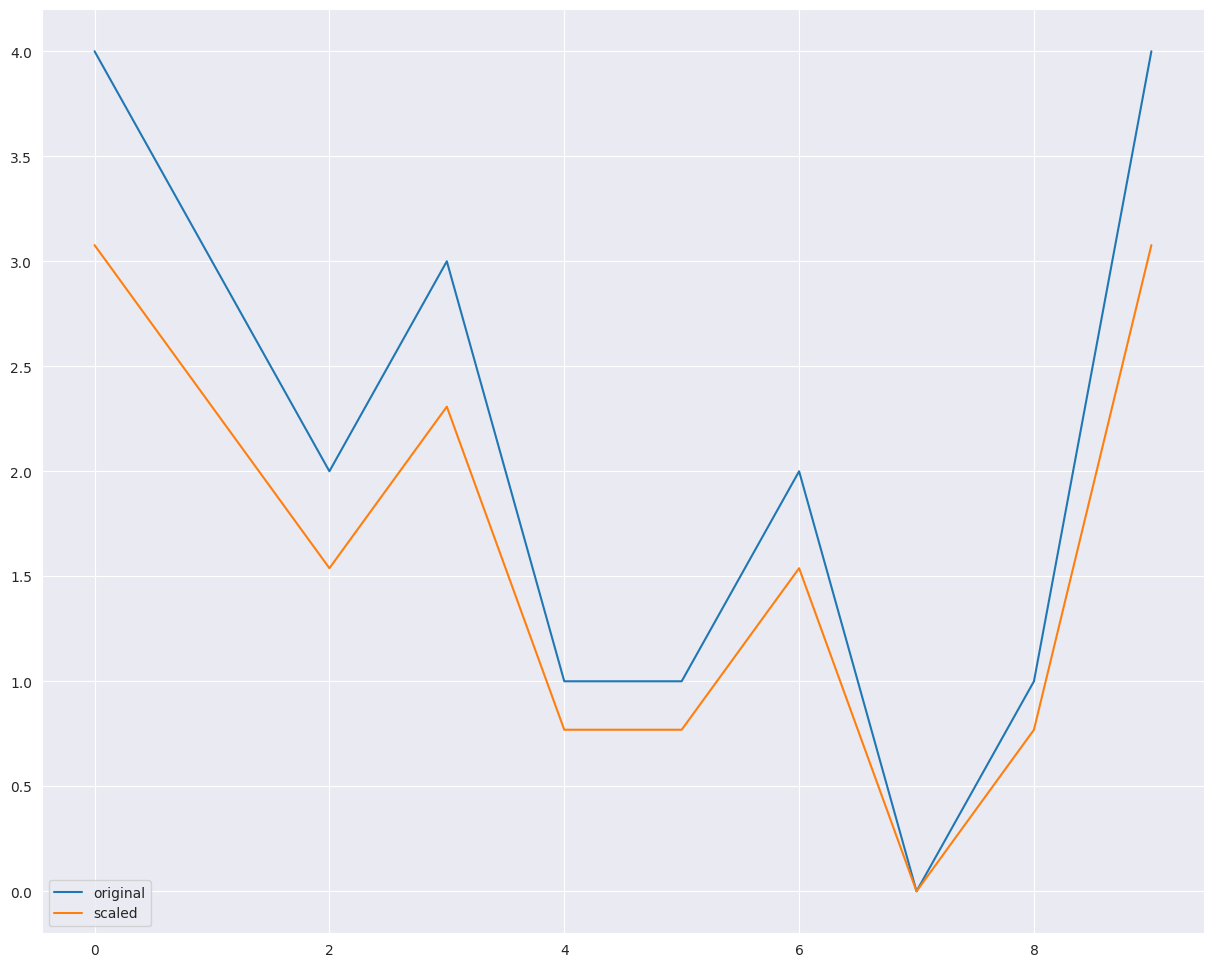

In [9]:
# Plot original data
plt.figure(figsize = (15,12))
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

***C'est vrai! Notez que les valeurs mises à l'échelle ont des variations plus faibles.***


####**Normalisation des petits nombres**
+ ***Dans les exemples précédents, vous avez la normalisation des nombres entiers. Dans cet exercice, vous examinerez le traitement des nombres fractionnaires - l'évolution des taux d'intérêt dans le pays de Bangalore au fil des ans. Pour votre usage, matplotlib.pyplot est importé en tant que plt.***

####**Instructions**

+ Mettre à l'échelle la liste rate_cuts, qui contient les modifications des taux d'intérêt.
+ Tracez les données d'origine par rapport aux données mises à l'échelle.

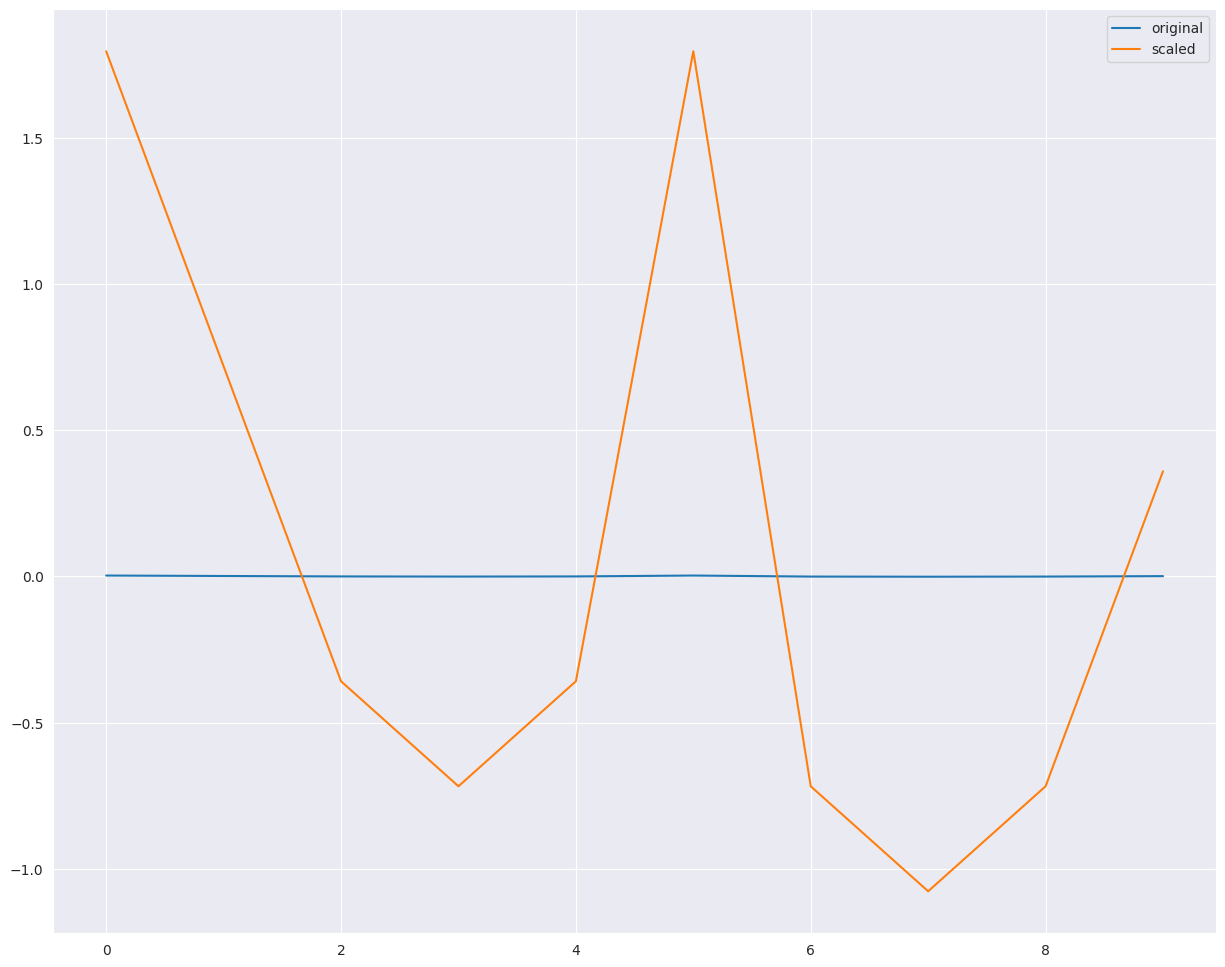

In [10]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.figure(figsize=(15,12))
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

***C'est vrai! Remarquez comment les changements dans les données d'origine sont négligeables par rapport aux données mises à l'échelle***


####**FIFA 18 : Normaliser les données**
+ ***FIFA 18 est un jeu vidéo de football sorti en 2017 pour PC et consoles. L'ensemble de données sur lequel vous êtes sur le point de travailler contient des données sur les 1000 meilleurs joueurs individuels du jeu. Vous explorerez diverses caractéristiques des données au fur et à mesure que nous avancerons dans le cours. Dans cet exercice, vous travaillerez avec deux colonnes, eur_wage, le salaire d'un joueur en euros et eur_value, sa valeur actuelle sur le marché des transferts.***

+ *Les données de cet exercice sont stockées dans un pandas DataFrame, fifa. whitenà partir de scipy.cluster.vq et matplotlib.pyplot tels plt qu'ils ont été pré-chargés.*

####**Consignes**

+ Mettre à l'échelle les valeurs de eur_wage et eur_value à l'aide de la fonction whiten().
+ Tracez les salaires échelonnés et les valeurs de transfert des joueurs en utilisant la méthode .plot()des pandas.
+ Vérifiez la moyenne et l'écart type des données mises à l'échelle en utilisant la méthode .describe() des pandas.

In [11]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

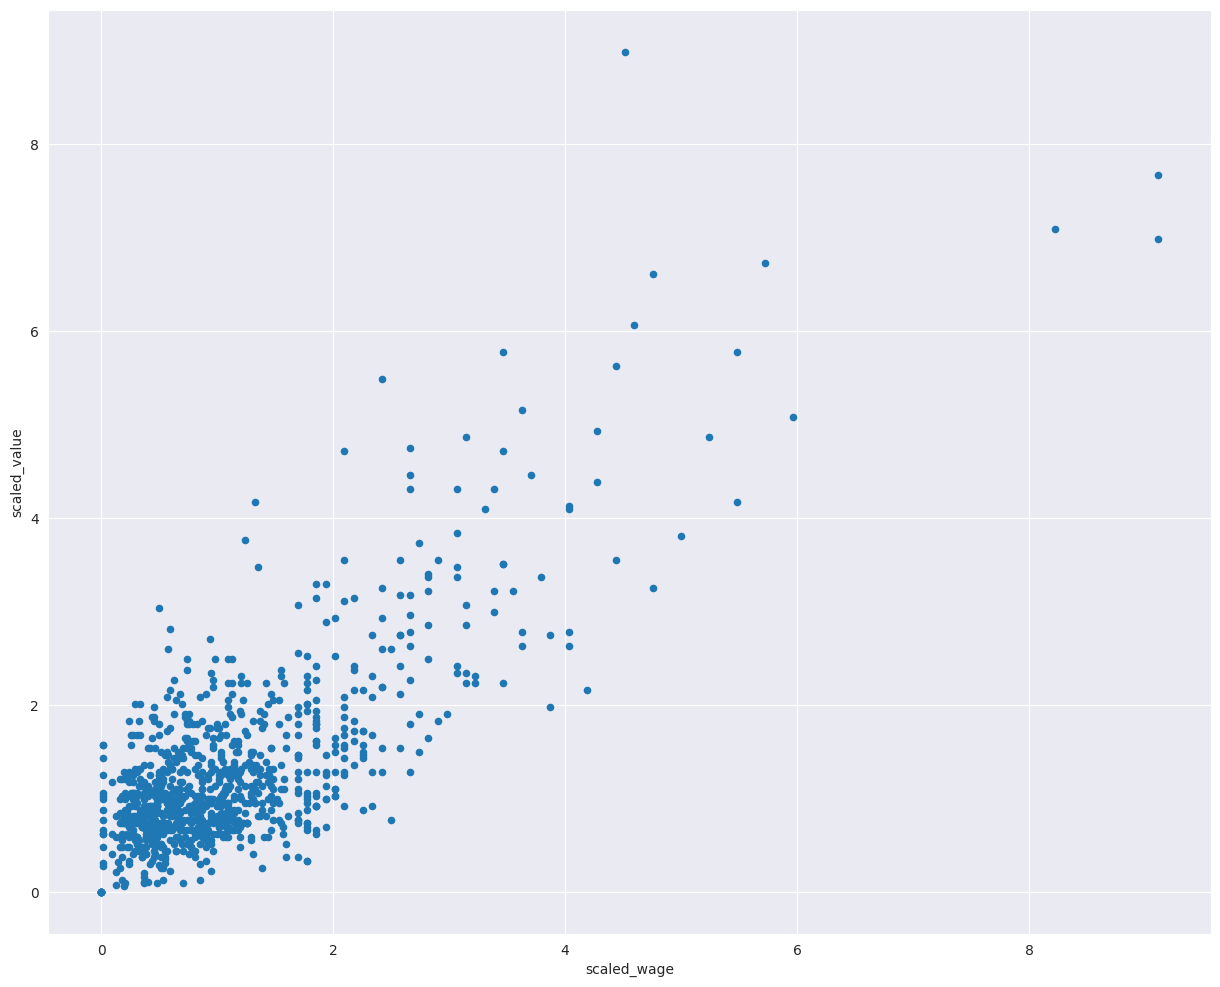

In [12]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter', figsize=(15,12))
plt.show()

In [13]:
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


***C'est vrai! Comme vous pouvez le voir, les valeurs mises à l'échelle ont un écart type de 1.***

####**1. Principes de base du clustering hiérarchique**

+ ***Bonjour à tous! Dans le chapitre précédent, vous avez été initié aux bases de deux algorithmes de clustering. Ce chapitre se concentre sur la réalisation d'un clustering hiérarchique avec SciPy. Cette vidéo examine les différents paramètres de l'algorithme de clustering hiérarchique.***

####**2. Création d'une matrice de distance à l'aide de la liaison**

+ ***Une étape critique consiste à calculer la matrice de distance à chaque étape. Ceci est réalisé grâce à la méthode de liaison disponible dans `scipy-dot-cluster-dot-hierarchy`. Ce processus calcule les distances entre les clusters lorsque nous passons de $N$ clusters à 1 cluster, où $N$ est le nombre de points. Il existe quatre paramètres pour cette méthode. Le premier paramètre est les observations. Le deuxième paramètre, method, indique à l'algorithme comment calculer la proximité entre deux clusters. La métrique est la fonction qui détermine la distance entre deux objets. La distance euclidienne est une distance en ligne droite entre deux points sur un plan 2D. Vous pouvez utiliser votre propre fonction ici. `optimal_ordering` est un argument facultatif qui modifie l'ordre de la matrice de liaison. Nous n'utiliserons pas cet argument. Explorons l'argument de la méthode.***

####**3. Quelle méthode utiliser ?**

+ ***Le deuxième paramètre, method, décide de la manière dont les clusters sont séparés à chaque étape. C'est le paramètre que nous allons ajuster dans cette leçon et voir les différences. La méthode unique décide de la proximité des clusters en fonction de leurs deux objets les plus proches. À l'autre extrême, la méthode complète décide de la proximité des centres de cluster en fonction de leurs deux objets les plus éloignés. Les méthodes de moyenne et de centroïde décident des proximités de cluster en fonction des moyennes arithmétiques et géométriques, respectivement. La méthode médiane utilise la médiane des objets du cluster. Enfin, la méthode de quartier que nous avons utilisée précédemment calcule la proximité des grappes en utilisant la différence entre les carrés additionnés de leurs grappes conjointes moins les carrés additionnés individuels. La méthode des quartiers se concentre sur des grappes plus concentriques vers son centre.***

####**4. Créer des étiquettes de cluster avec fcluster**

+ ***Une fois que vous avez créé la matrice de distance, vous pouvez créer les étiquettes de cluster via la méthode fcluster, qui prend trois arguments - la matrice de distance, le nombre de clusters et les critères pour former les clusters en fonction de certains seuils. Nous utiliserons la valeur de maxclust dans l'argument critère.***

####**5. Regroupement hiérarchique avec la méthode des quartiers**

+ ***Essayons de comprendre les différences entre différentes méthodes pour effectuer un clustering hiérarchique sur une liste de points sur un plan 2D. C'est le résultat en utilisant la méthode ward. Notez que les clusters sont généralement denses vers les centres.***

####**6. Clustering hiérarchique avec une seule méthode**

+ ***Ensuite, nous utiliserons la méthode unique pour voir comment les clusters changent. Rappelons que la méthode unique utilisait les deux objets les plus proches entre les clusters pour déterminer la proximité inter-cluster. Naturellement, les clusters formés lors de la mise en cluster par cette méthode sont plus dispersés. Bien que le cluster supérieur, étiqueté 1, soit à peu près le même, la plupart des objets du cluster 3 sont passés au cluster 2.***

####**7. Clustering hiérarchique avec méthode complète**

+ ***Dans la prochaine et dernière itération, nous examinons les clusters formés par la `méthode complèteè` . Cette méthode utilise les deux objets les plus éloignés parmi les clusters pour déterminer la proximité `inter-cluster`. Par coïncidence, cependant, les résultats de la méthode complète sur les mêmes points de données que nous avons utilisés sont similaires à ceux de la `méthode ward`.***

####**8. Réflexions finales sur le choix d'une méthode**

+ ***Voici quelques réflexions avant de terminer cette leçon. Tout d'abord, il n'y a pas de bonne méthode que vous pouvez appliquer à tous les problèmes auxquels vous êtes confrontés. Vous devrez étudier attentivement les données que vous allez traiter pour décider quelle méthode convient à votre cas, ce qui n'entre pas dans le cadre de ce cours.***

###**9. Essayons quelques exercices**

+ ***Il est maintenant temps pour vous d'essayer quelques exercices.***

###**EXERCICES**

####**Regroupement hiérarchique : méthode ward**

+ ***C'est l'heure du Comic Con ! Comic-Con est une convention annuelle basée sur la bande dessinée qui se tient dans les grandes villes du monde. Vous avez les données de la fréquentation de l'année dernière, le nombre de personnes sur le terrain de la convention à un moment donné. Vous aimeriez décider de l'emplacement de votre stand pour maximiser les ventes. À l'aide de la méthode des quartiers, appliquez un regroupement hiérarchique pour trouver les deux points d'attraction dans la zone.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné.*

####**Instructions**

+ Importer fcluster et linkage depuis scipy.cluster.hierarchy.
+ Utilisez la méthode ward dans la fonction linkage().
+ Attribuez des étiquettes de cluster en formant 2 clusters plats à partir de distance_matrix.
+ Exécutez le code de traçage pour voir les résultats.

In [14]:
comic_con = pd.read_csv('comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [15]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

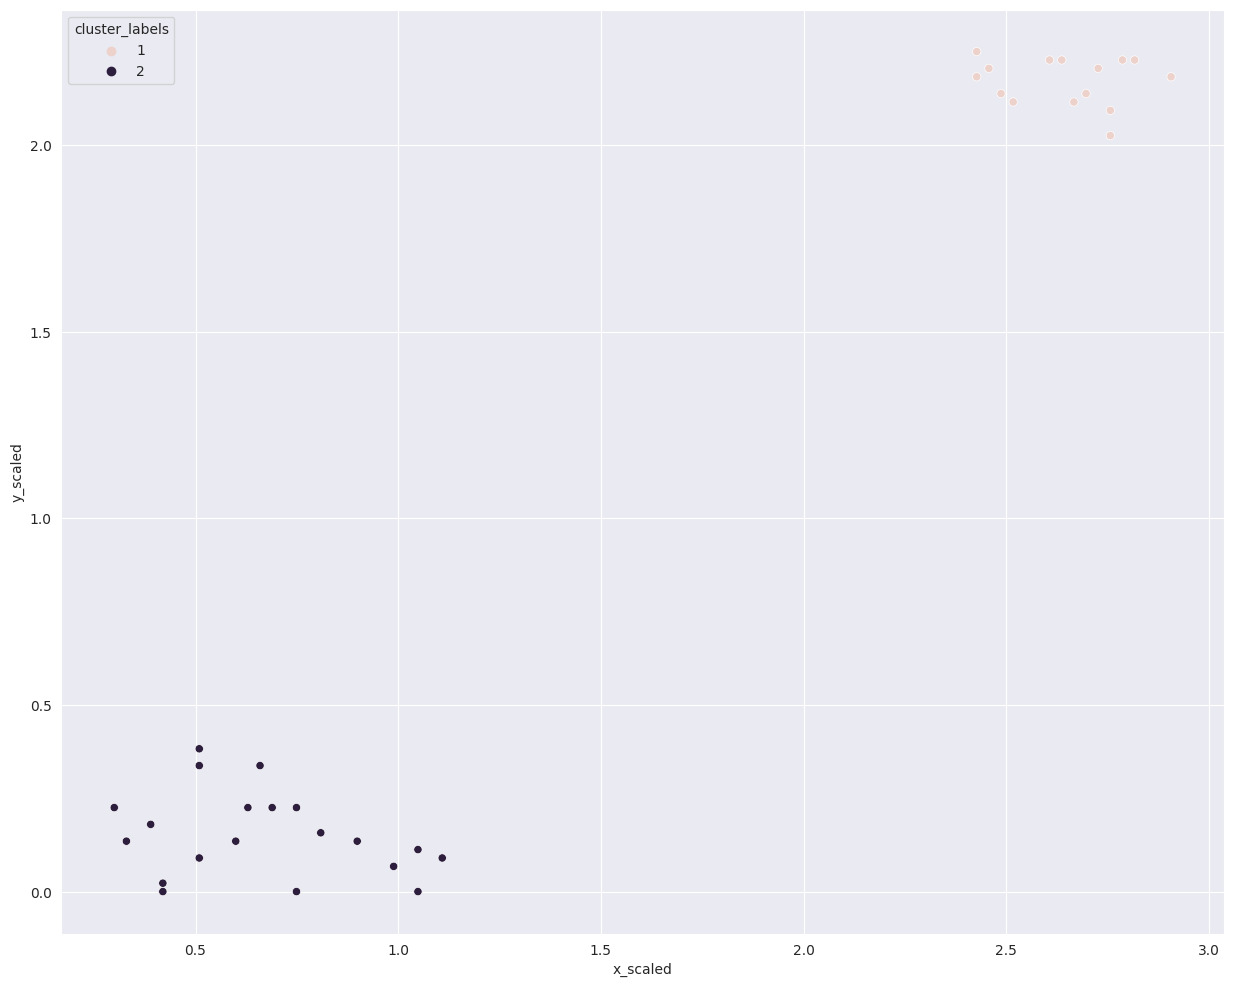

In [16]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward' , metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix,2 , criterion='maxclust')

# Plot clusters
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

***C'est exact ! Remarquez que les deux groupes correspondent aux points d'attractions de la figure vers le bas (une scène) et le haut à droite (un stand intéressant).***

####**Clustering hiérarchique : méthode unique**

+ ***Utilisons le même jeu de données de fréquentation et vérifions si des changements sont observés si nous utilisons une méthode différente pour le clustering.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné.*

####**Instructions**

+ Importer fcluster et linkage depuis scipy.cluster.hierarchy.
+ Utilisez la singleméthode dans la fonction linkage().

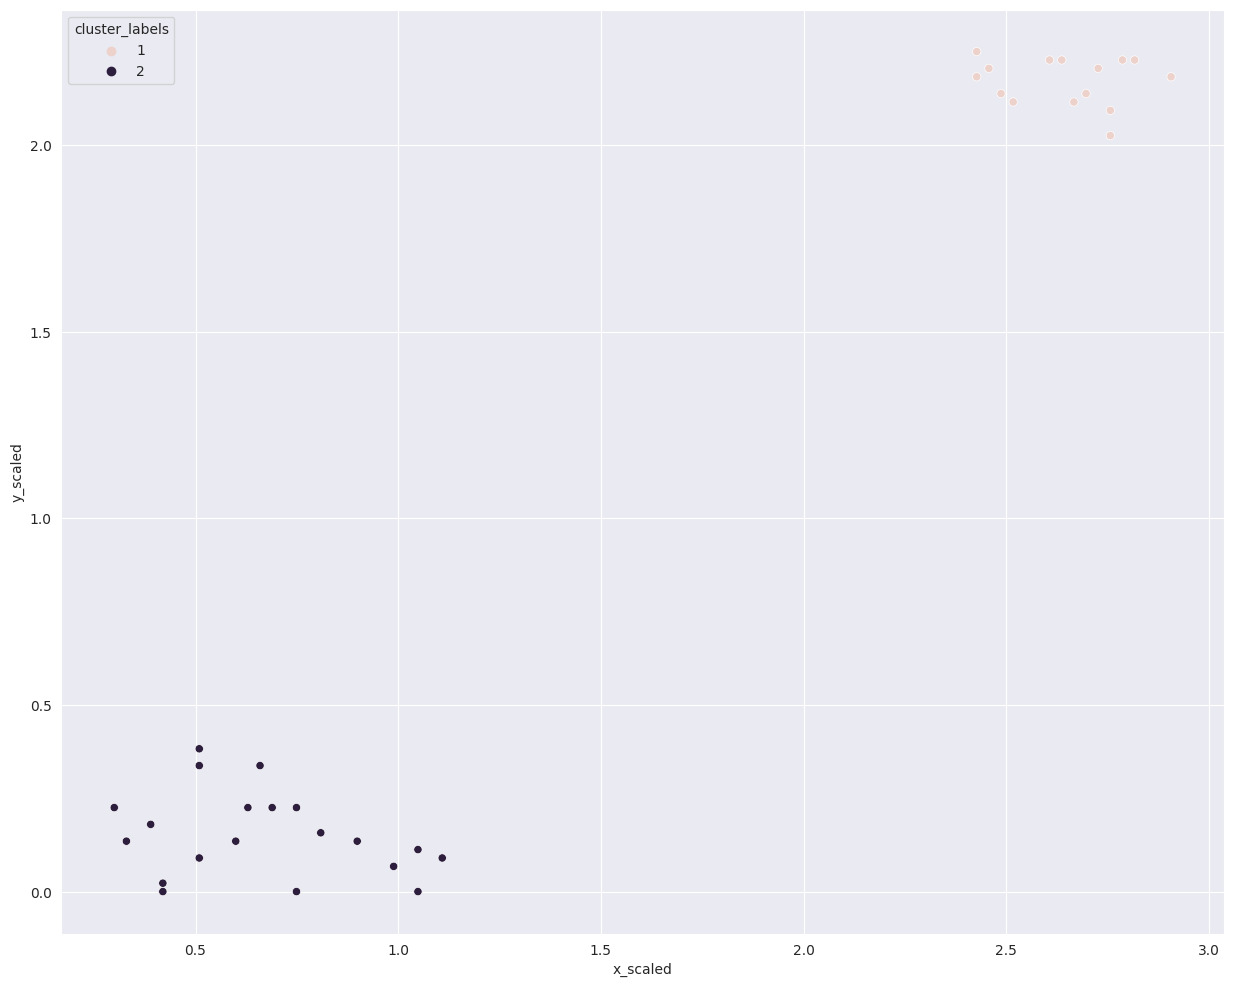

In [17]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

***C'est exact ! Notez que dans cet exemple, les clusters formés ne sont pas différents de ceux créés à l'aide de la méthode ward.***


####**Clustering hiérarchique : méthode complète**
+ ***Pour la troisième et dernière fois, utilisons le même ensemble de données de fréquentation et vérifions si des changements sont observés si nous utilisons une méthode différente de regroupement.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné.*

####**Instructions**

+ Importer fcluster et linkage depuis scipy.cluster.hierarchy.
+ Utilisez la méthode complete dans la fonction .linkage().

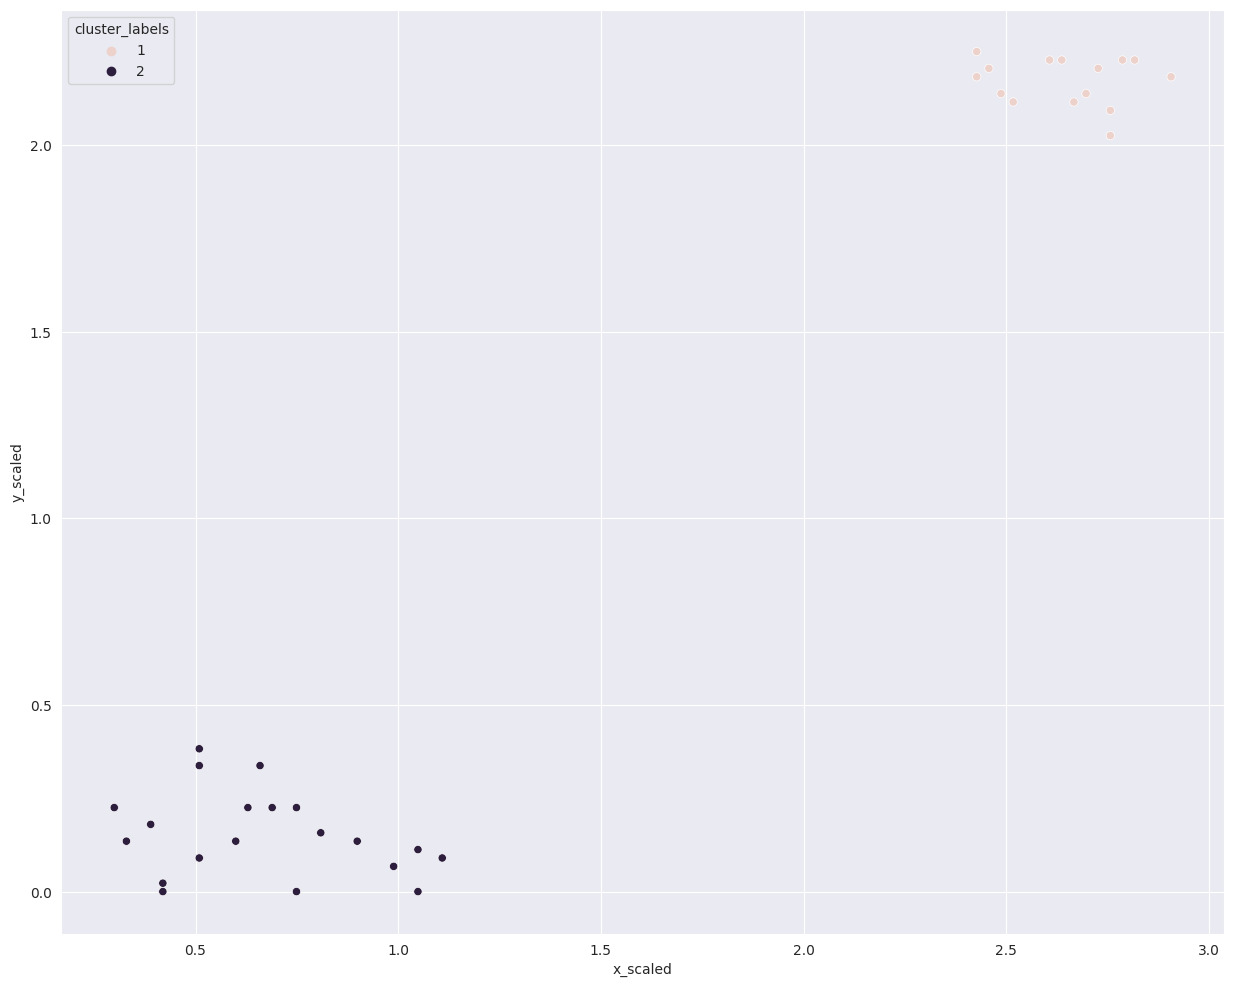

In [18]:
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage

# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

***C'est exact ! Par coïncidence, les grappes formées ne sont pas différentes des méthodes de service ou simples. Ensuite, apprenons à visualiser les clusters.***

####**1. Visualisez les clusters**

+ ***Salut tout le monde! Maintenant que vous êtes familiarisé avec le clustering hiérarchique et le fonctionnement de l'algorithme, faisons un pas dans la direction de la visualisation des clusters.***

####**2. Pourquoi visualiser les clusters ?**
+ ***Pourquoi avons-nous besoin de visualiser les clusters ? On peut rapidement donner un sens aux clusters formés par n'importe quel algorithme en l'analysant visuellement plutôt qu'en regardant simplement les centres de cluster. Elle peut servir d'étape supplémentaire pour la validation des clusters formés. De plus, vous pouvez également repérer les tendances dans vos données en les parcourant visuellement. Examinons maintenant les manières possibles de visualiser les clusters que nous avons formés dans notre exercice précédent.***

####**3. Une introduction à Seaborn**

+ ***Seaborn est une bibliothèque de visualisation de données en Python basée sur matplotlib. Il fournit de meilleurs thèmes de traçage par défaut, qui peuvent être modifiés facilement et intuitivement. Il a des fonctions pour des visualisations rapides dans le contexte de l'analyse de données. Dans ce cours sur le clustering, nous utilisons pandas DataFrames pour stocker nos données, en ajoutant souvent une colonne séparée pour les centres de cluster. Seaborn fournit un argument dans sa méthode de diagramme de dispersion pour nous permettre d'utiliser différentes couleurs pour les étiquettes de cluster afin de différencier les clusters lors de leur visualisation. Comparons l'implémentation des deux techniques de traçage - matplotlib et seaborn.***

####**4. Visualisez les clusters avec matplotlib**

+ ***Pour visualiser les clusters, nous importons d'abord la classe pyplot dans matplotlib. Commençons par un pandas DataFrame qui a les colonnes - $x$, $y$ et label pour ses coordonnées $x$ et $y$ et les étiquettes de cluster, $A$ et $B$. Nous utiliserons l'argument c de la méthode scatter, pour attribuer une couleur à chaque cluster. Cependant, nous devons d'abord mapper manuellement chaque cluster à une couleur. Par conséquent, nous définissons un dictionnaire nommé couleurs avec les étiquettes de cluster comme clés et la couleur associée aux clusters comme valeurs. Nous passons ensuite une liste de couleurs à l'argument c à l'aide d'une fonction lambda, qui renvoie la valeur correspondante de chaque étiquette de cluster.***

####**5. Visualisez les clusters avec Seaborn**

+ ***L'implémentation dans seaborn est assez simple avec la méthode de diagramme de dispersion intégrée. Nous importons d'abord la classe pyplot et la bibliothèque seaborn. Nous utilisons le même DataFrame que précédemment pour visualiser les clusters. Pour visualiser les points de données avec chaque point associé à une couleur distincte, nous utilisons l'argument hue de la méthode scatterplot et transmettons le nom de colonne des étiquettes de cluster, qui est labels dans cet exemple. Maintenant que nous avons écrit le code pour chacun d'eux, comparons les résultats. Rappelez-vous de la dernière leçon que seaborn montre un cluster supplémentaire avec l'étiquette 0 si les étiquettes de cluster sont des entiers. Dans cet exemple, nous avons attribué manuellement des étiquettes de cluster de chaînes, ce problème ne se posera donc pas.***

####**6. Comparaison des deux méthodes de visualisation**

+ ***Bien que les résultats soient comparables, il y a deux raisons pour lesquelles nous préférons seaborn. Tout d'abord, l'implémentation à l'aide de seaborn était plus pratique une fois que vous avez stocké les étiquettes de cluster dans votre DataFrame. Deuxièmement, vous n'avez pas besoin de sélectionner manuellement les couleurs dans seaborn car cela utiliserait une palette par défaut, quel que soit le nombre de clusters que vous avez.***

####**7. Ensuite : Essayez quelques visualisations**

+ ***Maintenant que vous savez comment visualiser des données à l'aide de deux bibliothèques, essayons quelques exercices.***

####**Visualiser les clusters avec matplotlib**
+ ***Nous avons discuté du fait que les visualisations sont nécessaires pour évaluer les clusters qui se forment et repérer les tendances dans vos données. Concentrons-nous maintenant sur la visualisation de l'ensemble de données de fréquentation de Comic-Con à l'aide du module matplotlib.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné. cluster_labels a les étiquettes de cluster. Un objet de liaison est stocké dans la variable distance_matrix.*

####**Instructions**

+ Importez la classe pyplot du module matplotlib en tant que plt.
+ Définissez un dictionnaire colors pour deux étiquettes de cluster, 1et 2.
+ Tracez un nuage de points avec des couleurs pour chaque cluster tel que défini par le dictionnaire colors.

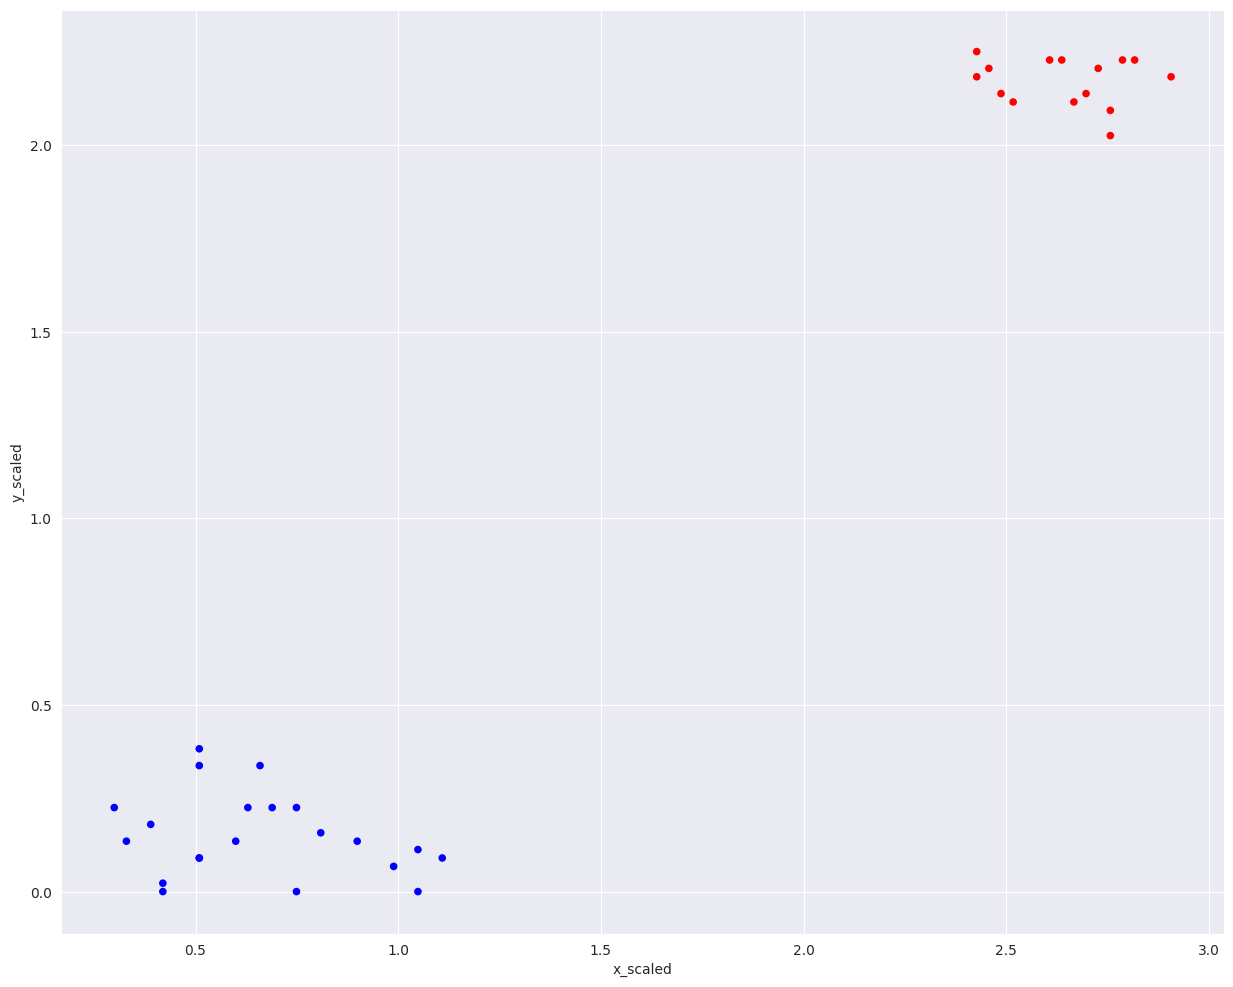

In [19]:
# Import the pyplot class
from matplotlib import pyplot as plt

# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}

# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled',
                	   y='y_scaled',
                	   c=comic_con['cluster_labels'].apply(lambda x: colors[x]),
                       figsize=(15,12))
plt.show()

***C'est exact ! Les deux clusters différents sont représentés dans des couleurs différentes.***

####**Visualisez les clusters avec seaborn**
+ ***Visualisons maintenant l'ensemble de données de fréquentation de Comic Con à l'aide du module seaborn. La visualisation des clusters à l'aide seaborn est plus facile avec la fonction inbuild huepour les étiquettes de cluster.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaledet y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné. cluster_labels a les étiquettes de cluster. Un objet de liaison est stocké dans la variable distance_matrix.*

####**Instructions**

+ Importez le module seaborn au format sns.
+ Tracez un nuage de points en utilisant la méthode .scatterplot() de seaborn, avec les étiquettes de cluster comme argument hue.



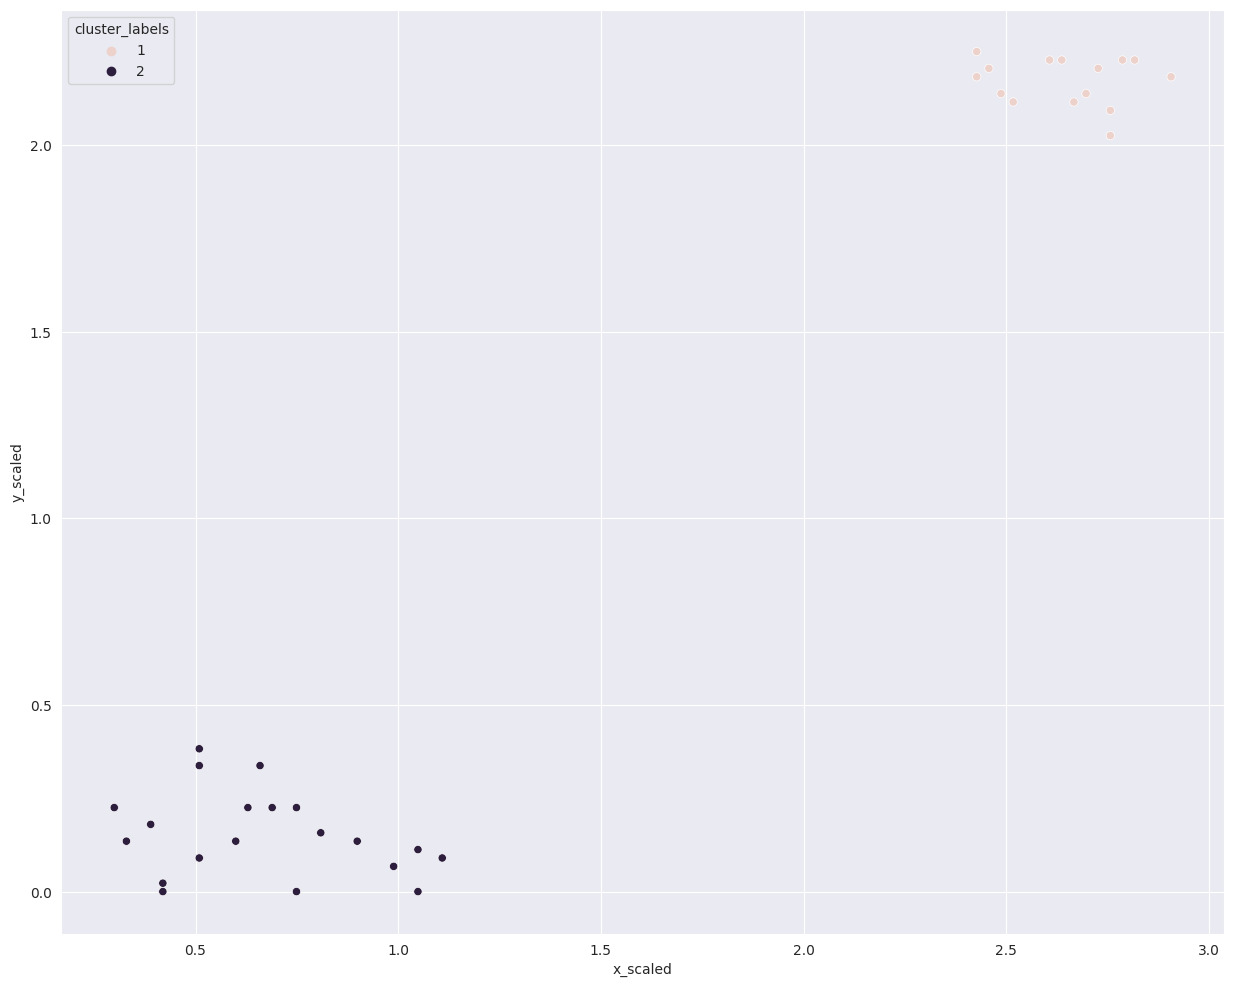

In [20]:
# Import the seaborn module
import seaborn as sns

# Plot a scatter plot using seaborn
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels',
                data = comic_con)
plt.show()

***C'est exact ! Notez que la légende s'affiche automatiquement lors de l'utilisation de l'argument hue.***

####**1. Combien de clusters ?**

+ ***Salut tout le monde! Dans cette vidéo, nous allons explorer un moyen de décider du nombre de clusters présents dans nos données.***

####**2. Introduction aux dendrogrammes**

+ ***Jusqu'à présent, nous avons examiné graphiquement le nombre de points dans nos ensembles de données pour décider du nombre de clusters à former. Pour décider du nombre de clusters dans le clustering hiérarchique, nous pouvons utiliser un diagramme graphique appelé le dendrogramme. Un dendrogramme est un diagramme de branchement qui montre la progression dans un objet de liaison au fur et à mesure que nous progressons dans l'algorithme de regroupement hiérarchique. Prenons un exemple.***

####**3. Créer un dendrogramme dans SciPy**

+ ***La première étape de la création d'un dendrogramme consiste à importer la méthode depuis scipy-dot-cluster-dot-hierarchy. Ensuite, nous utilisons la méthode de liaison pour créer une matrice de distance. Enfin, nous utilisons la méthode du dendrogramme et fournissons l'objet de liaison comme argument, et affichons le tracé.***

####**4. Démonstration du dendrogramme**

+ ***Pour comprendre les subtilités d'un dendrogramme, regardons le dendrogramme qui a été généré, puis faisons les clusters correspondants. Rappelez-vous l'algorithme de clustering hiérarchique, où chaque étape était le résultat de la fusion des deux clusters les plus proches à l'étape précédente. L'axe des x représente les points individuels, tandis que l'axe des y représente la distance ou la dissimilarité entre les clusters. Dans le dendrogramme, chaque U inversé représente un cluster divisé en ses deux clusters enfants. Le U inversé en haut de la figure représente un groupe unique de tous les points de données. La largeur de la forme en U représente la distance entre les deux clusters enfants. Un U plus large signifie donc que les deux clusters enfants étaient plus éloignés l'un de l'autre par rapport à un U plus étroit dans le diagramme.***

####**5. Démonstration du dendrogramme - 2**

+ ***Maintenant, si vous tracez une ligne horizontale à n'importe quelle partie de la figure, le nombre de lignes verticales qu'elle croise vous indique le nombre de clusters à ce stade, et la distance entre ces lignes verticales indique la distance inter-cluster. Au niveau de la ligne horizontale tracée sur la figure, on voit qu'il y a trois clusters. Lorsque vous déplacez la ligne ci-dessous, le nombre de clusters augmente mais la distance inter-cluster diminue. Cette information nous aide à décider du nombre de clusters. Par exemple, même si nous n'avons pas examiné la distribution des points de données, il semble que les trois premiers clusters aient les distances les plus élevées entre eux. À ce stade, je dois répéter qu'il n'y a pas de bonne métrique pour décider combien de clusters sont idéaux. Par exemple, il semble que le choix de trois groupes devrait être idéal pour cet exercice. Cependant, un ' L'argument de s pour deux ou quatre clusters peut également être valable. Examinons les résultats de chacun de ces trois cas.***

####**6. Deux clusters**

+ ***Voici le résultat de l'exécution du clustering avec deux clusters.***

####**7. Trois clusters**

+ ***Voici le résultat avec trois clusters.***

####**8. Quatre clusters**

+ ***Et voici à quoi ressemblent 4 clusters sur les données. Bien que le dendorgramme ait indiqué que nous pouvions aller de l'avant avec trois clusters, le cas avec quatre clusters est également logique. Par conséquent, une vérification supplémentaire de visualisation des données peut être effectuée avant de décider du nombre de clusters.***

####**9. Ensuite, essayez quelques exercices**

+ ***Maintenant, essayons quelques exercices sur la façon de décider du nombre de clusters en utilisant le dendrogramme !***

###**EXERCICES**

####**Créer un dendrogramme**
+ ***Les dendrogrammes sont des diagrammes de branchement qui montrent la fusion des clusters au fur et à mesure que nous nous déplaçons dans la matrice de distance. Utilisons les données de fréquentation du Comic Con pour créer un dendrogramme.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné. cluster_labels a les étiquettes de cluster. Un objet de liaison est stocké dans la variable distance_matrix.*

####**Instructions**

+ Importez la fonction dendrogram depuis scipy.cluster.hierarchy.
+ Créez un dendrogramme à l'aide de l'objet de liaison.
+ Affichez le dendrogramme en utilisant la méthode .show() de l'objet plt.

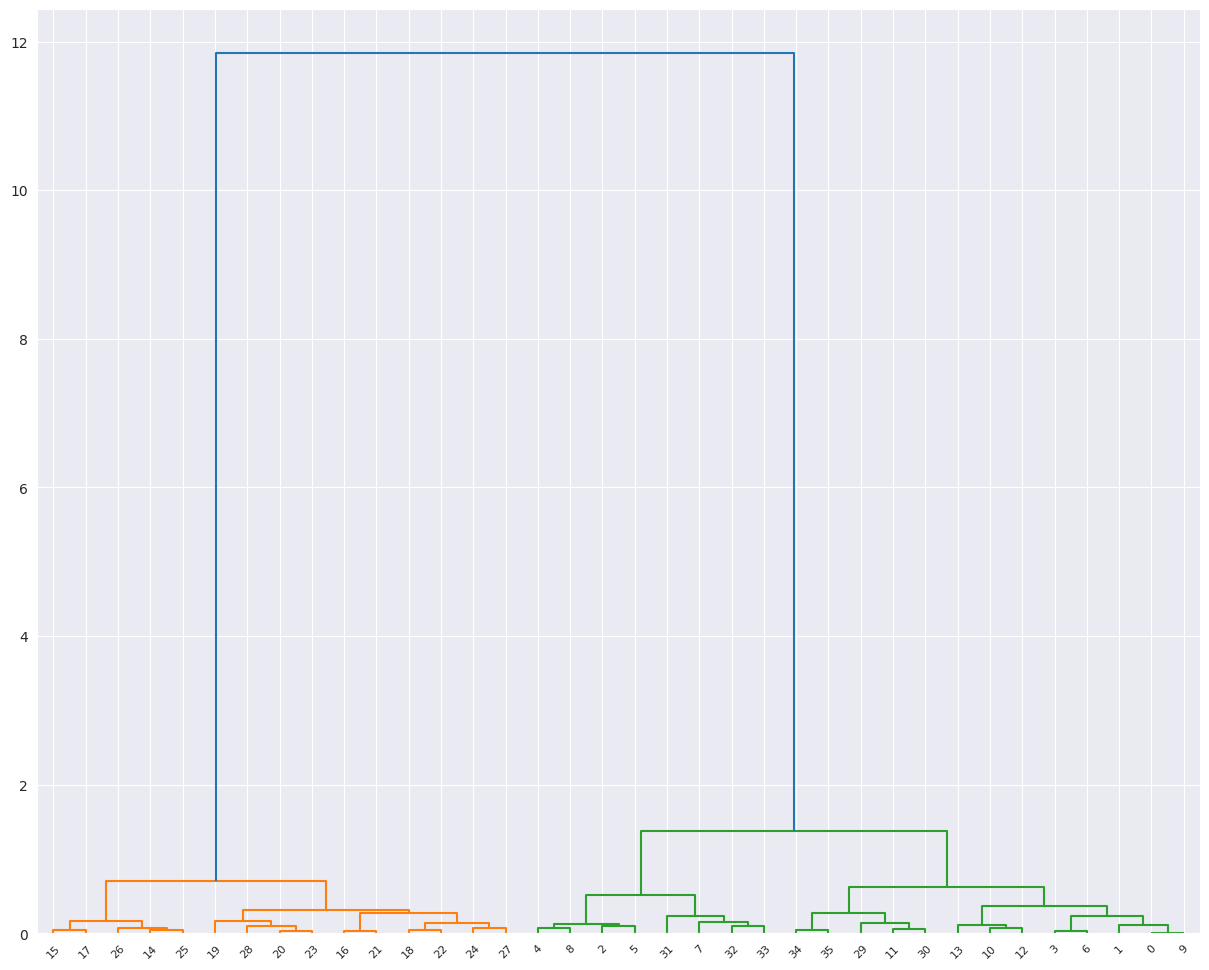

In [21]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram

# Create a dendrogram
plt.figure(figsize=(15,12))
dn = dendrogram(linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean'))
# Display the dendogram
plt.show()

***C'est exact ! Remarquez la différence significative entre les distances inter-clusters au-delà des deux premiers clusters.***

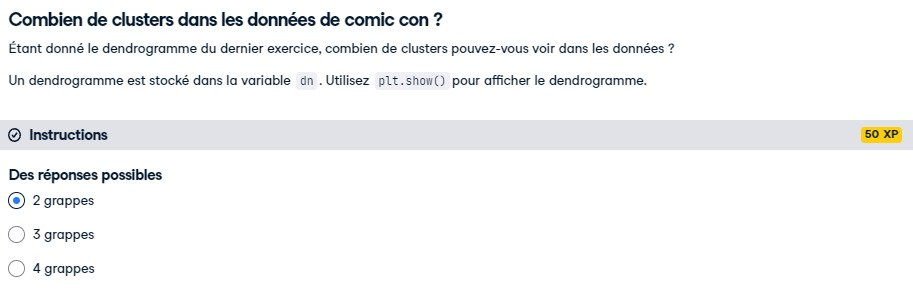

***Vous avez raison! Notez que les deux groupes supérieurs sont les plus éloignés l'un de l'autre.***

####**1. Limites du clustering hiérarchique**
+ ***Salut tout le monde, bienvenue dans la dernière vidéo du chapitre ! Maintenant que vous êtes familiarisé avec le clustering hiérarchique, examinons les défis liés à l'exécution de ce type de clustering.***

####**2. Mesurer la vitesse dans le clustering hiérarchique**

+ ***Concevons une petite tâche pour mesurer la vitesse de diverses itérations de clustering hiérarchique afin de vérifier combien de temps cela prend pour les itérations. Nous utiliserons le module timeit pour vérifier l'exécution des fonctions. Comme l'étape la plus longue du processus de regroupement hiérarchique est la construction de la matrice de distance par la méthode de liaison, nous chronométrons le temps nécessaire pour former la matrice. Pour les besoins de cet exercice, nous utiliserons des points de données générés aléatoirement sur le plan XY. Pour tester les limites de l'algorithme, nous utiliserons un nombre croissant de points de données.***

####**3. Utilisation du module timeit**

+ ***Pour démontrer l'utilisation de timeit pour vérifier davantage combien de temps cela peut prendre pour un grand nombre de points, regardons combien de temps il faut pour exécuter la méthode de liaison pour 100 points avec des coordonnées générées aléatoirement. Nous importons d'abord les modules random et timeit pour générer respectivement les points et le temps d'exécution d'une fonction. Ensuite, nous créons un DataFrame avec 100 points et générons aléatoirement 100 points dans des coordonnées comprises entre zéro et cent. Pour vérifier l'heure d'une fonction dans l'interpréteur, nous utilisons le symbole de pourcentage avant le mot-clé timeit suivi de l'instruction que nous étions sur le point d'exécuter. Le module timeit exécute la fonction plusieurs fois et signale la moyenne et les écarts types des durées d'exécution. Lorsque j'exécute ce code sur un Macbook Air 2017 exécutant des ordinateurs portables Jupyter, le temps moyen d'exécution de l'instruction est d'environ 1 point 02 millisecondes. Effectuons maintenant des itérations pour un nombre croissant de points, vérifions combien de temps il faut pour exécuter la méthode de liaison, puis traçons un graphique pour comparer les performances.***

####**4. Comparaison de la durée d'exécution de la méthode de liaison**

+ ***Si vous tracez le temps d'exécution de la méthode de liaison avec le nombre de points, vous pouvez voir que le temps d'exécution augmente avec l'augmentation du nombre de points de données. En plus de cela, vous remarquerez que l'augmentation du temps d'exécution n'est pas linéaire par rapport à l'augmentation des points de données, mais quadratique. Cela rend la technique de regroupement hiérarchique irréalisable pour un grand nombre de points de données, par exemple, les habitudes d'achat de tous les clients de Walmart en un an.***

####**5. Ensuite - exercices**

+ ***Essayons maintenant quelques exercices pour mesurer le temps des fonctions par timeit.***

###**EXERCICES**

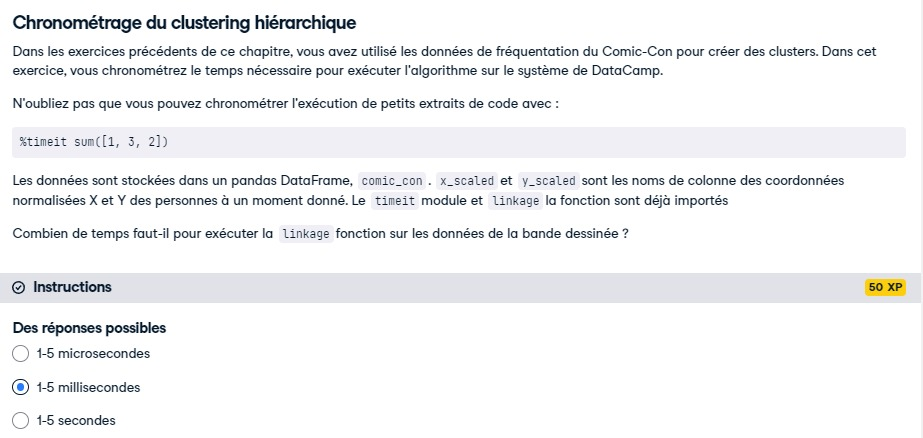

In [22]:
%timeit linkage(comic_con[['x_scaled', 'y_scaled']], method='ward', metric='euclidean')

788 µs ± 136 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


***Vous avez raison! Il n'a fallu que quelques millisecondes pour exécuter les données.***

####**FIFA 18 : explorer les défenseurs**
+ ***Dans l'ensemble de données FIFA 18, divers attributs de joueurs sont présents. Deux de ces attributs sont :***

  + *tacle glissé : un nombre entre 0 et 99 qui indique la précision avec laquelle un joueur est capable d'effectuer des tacles glissés*
  + *agressivité : un nombre entre 0 et 99 qui signifie l'engagement et la volonté d'un joueur*


+ ***Ceux-ci sont généralement élevés chez les joueurs soucieux de la défense. Dans cet exercice, vous allez effectuer un clustering basé sur ces attributs dans les données.***

+ ***Ces données se composent de 5 000 lignes et sont considérablement plus volumineuses que les ensembles de données précédents. L'exécution du clustering hiérarchique sur ces données peut prendre jusqu'à 10 secondes.***

+ *Les modules suivants sont préchargés : `dendrogram, linkage, fcluster from scipy.cluster.hierarchy, matplotlib.pyplot as plt`, seabornas sns. Les données sont stockées dans un pandas DataFrame, fifa.*

####**Consignes**

+ Ajustez les données mises à l'échelle dans des colonnes scaled_sliding_tackle et scaled_aggression dans un algorithme de clustering hiérarchique. De plus, vous voudrez peut-être vérifier combien de temps il faut pour exécuter les données dans le shell IPython à l'aide du module timeit.
+ Attribuez des étiquettes de cluster à chaque ligne des données à l'aide de la fonction fcluster() (utilisez 3 clusters).
+ Afficher les centres de cluster de chaque cluster par rapport aux colonnes mises à l'échelle en calculant la valeur moyenne pour chaque cluster.
+ Créez un nuage de points en utilisant seaborn l' attribut scaled_sliding_tackle sur l'axe des $x$ et l'attribut scaled_aggression sur l'axe des $y$. Attribuez une couleur différente à chaque cluster.

In [23]:
fifa = pd.read_csv('fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [24]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

In [25]:
# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


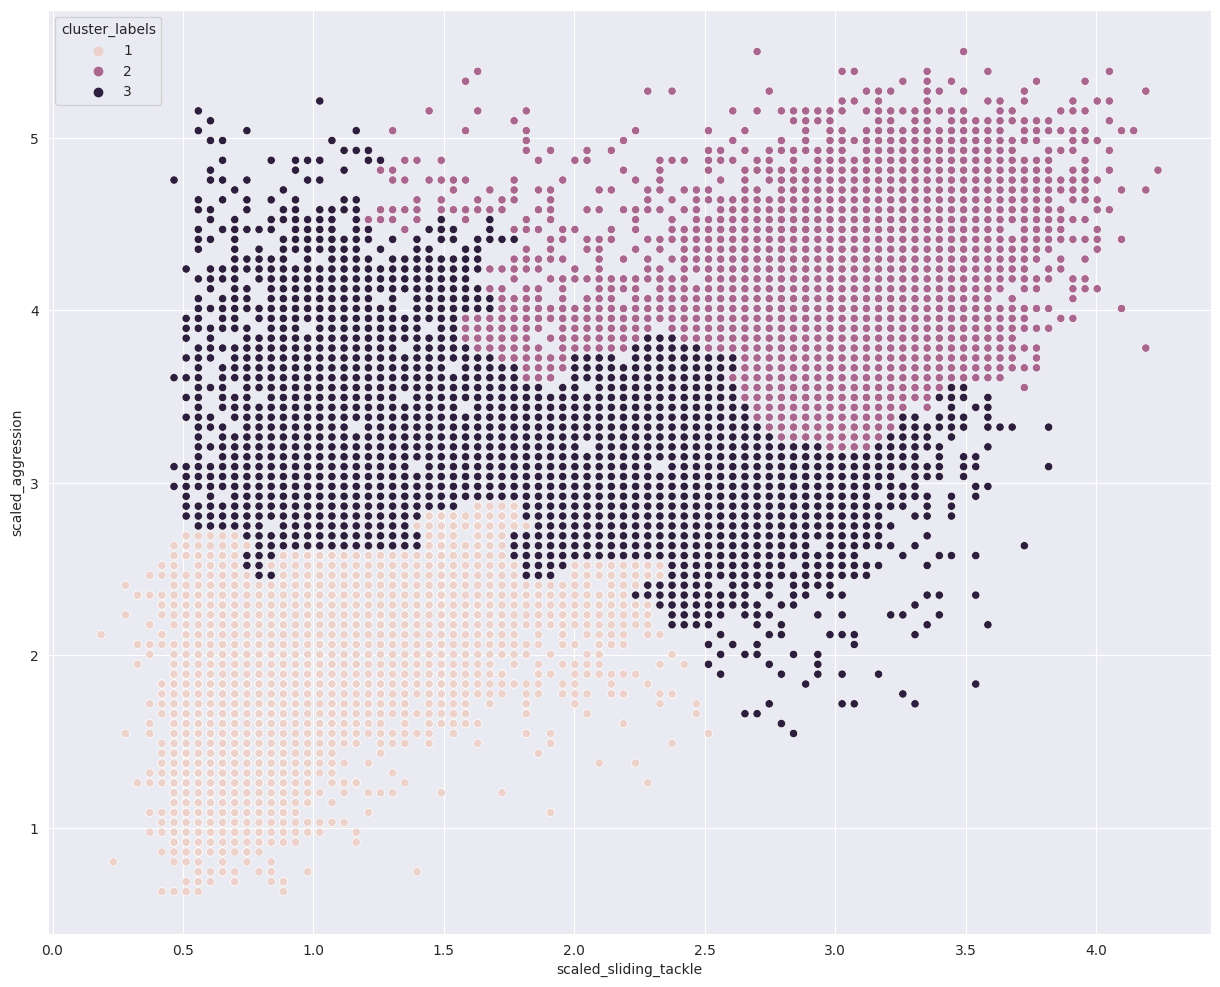

In [26]:
# Create a scatter plot through seaborn
plt.figure(figsize=(15,12))
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa)
plt.show()

***C'est exact ! Remarquez combien de temps il a fallu pour exécuter le clustering hiérarchique sur quelques milliers de points de données. Dans le chapitre suivant, vous explorerez les clusters dans les données via le clustering k-means.***

####**1. Principes de base du clustering k-means**

+ ***Salut tout le monde! Maintenant que vous êtes familiarisé avec le clustering hiérarchique, passons au clustering k-means. Dans le premier chapitre, nous avons examiné l'algorithme derrière le clustering k-means - dans ce chapitre, nous nous concentrerons sur les différents paramètres et leurs implications sur les résultats du clustering. Commençons!***

####**2. Pourquoi le clustering k-means ?**

+ ***Nous avons exploré un problème critique dans le clustering hiérarchique dans le dernier chapitre - le temps d'exécution. Ce chapitre traite d'une nouvelle technique de clustering, le clustering K-means, qui vous permet de regrouper de grands ensembles de données en une fraction du temps.***

####**. Étape 1 : Générer des centres de cluster**

+ ****Pour effectuer le clustering K-Means dans scipy, il y a deux étapes impliquées - générer les centres de cluster, puis attribuer les étiquettes de cluster. La première étape est réalisée par la méthode kmeans. Il y a cinq arguments pour cette méthode. Le premier argument est la liste des observations, qui ont été standardisées par la méthode de blanchiment. Le deuxième argument, k_or_guess, est le nombre de clusters. L'argument suivant est le nombre d'itérations de l'algorithme à effectuer. Sa valeur par défaut est 20. Le quatrième argument est le seuil. L'idée derrière cet argument est que l'algorithme se termine si le changement de distorsion depuis la dernière itération k-means est inférieur ou égal au seuil. Sa valeur par défaut est 10 élevé à la puissance moins 5, soit 0-point-00001. Le dernier argument est une valeur booléenne indiquant si une vérification doit être effectuée sur les données pour la présence de valeurs infinies ou NaN. La valeur par défaut est True, ce qui garantit que les points de données avec NaN ou des valeurs infinies ne sont pas pris en compte pour la classification, ce qui garantit que les résultats sont précis et impartiaux. La fonction k-means renvoie deux arguments, les centres de cluster et la distorsion. Les centres de cluster sont également connus sous le nom de livre de codes. Vous remarquerez que k-means s'exécute très rapidement par rapport au clustering hiérarchique, car le nombre d'opérations est considérablement inférieur dans le clustering k-means. La fonction k-means renvoie deux arguments, les centres de cluster et la distorsion. Les centres de cluster sont également connus sous le nom de livre de codes. Vous remarquerez que k-means s'exécute très rapidement par rapport au clustering hiérarchique, car le nombre d'opérations est considérablement inférieur dans le clustering k-means. La fonction k-means renvoie deux arguments, les centres de cluster et la distorsion. Les centres de cluster sont également connus sous le nom de livre de codes. Vous remarquerez que k-means s'exécute très rapidement par rapport au clustering hiérarchique, car le nombre d'opérations est considérablement inférieur dans le clustering k-means.***

####**4. Comment la distorsion est-elle calculée ?**

+ ***La distorsion est calculée comme la somme des carrés des distances entre les points de données et les centres de cluster, comme le montre cette figure.***

####**5. Étape 2 : Générer des libellés de cluster**

+ ***L'étape suivante consiste à utiliser la méthode vq pour générer des étiquettes de cluster. Il faut trois arguments. Le premier argument est la liste des observations, qui ont été standardisées par la méthode de blanchiment. Le deuxième argument est le livre de codes, c'est-à-dire la première sortie de la méthode kmeans. Le troisième argument facultatif est check_finite, une valeur booléenne indiquant si une vérification doit être effectuée sur les données pour la présence de valeurs infinies ou NaN. Par défaut, sa valeur est définie sur True. La fonction renvoie les étiquettes de cluster, également appelées "index du livre de codes" et la distorsion.***

####**6. Une note sur les distorsions**

+ ***Explorons plus avant les distorsions. kmeans renvoie une valeur unique de distorsions basée sur les données globales, tandis que vq renvoie une liste de distorsions, une pour chaque point de données. La moyenne de la liste des distorsions de la méthode vq doit être approximativement égale à la valeur de distorsion de la méthode kmeans si la même liste d'observations est transmise.***

####**7. Courir k-means**

+ ***Exécutons k-means en Python. Tout d'abord, nous importons kmeans et vq. Ensuite, nous utilisons les kmeans pour obtenir les centres de cluster et vq pour obtenir les étiquettes de cluster. Ensuite, nous affichons un nuage de points avec seaborn.***

####**8. Complot Seaborn**

+ ***Voici à quoi ressemble l'intrigue résultante. Remarquez les trois clusters distincts sur la figure.***

####**9. Ensuite : exercices !**

+ ***Maintenant que vous êtes familiarisé avec le clustering kmeans dans scipy, testons vos connaissances à travers quelques exercices.***

###**EXERCICES**

####**K-means clustering : premier exercice**
+ ***Cet exercice vous familiarisera avec l'utilisation du clustering k-means sur un jeu de données. Utilisons le jeu de données Comic Con et vérifions comment fonctionne le clustering k-means.***

+ ***Rappelez-vous les deux étapes du clustering k-means :***

  + Définissez les centres de cluster par la fonction kmeans().
  + Il a deux arguments obligatoires :
    + les observations et le nombre de clusters.

+ Attribuez des étiquettes de cluster via la fonction vq().
+ Il a deux arguments obligatoires : ***les observations et les centres de cluster***.

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné.

####**Instructions**

+ Importation des fonctions kmeans et vq  dans SciPy.
+ Générez des centres de cluster à l'aide de la fonction kmeans() avec deux clusters.
+ Créez des étiquettes de cluster à l'aide de ces centres de cluster.

In [27]:
comic_con = pd.read_csv('comic_con.csv', index_col=0)
comic_con.head()

,x_coordinate,y_coordinate
0,17,4
1,20,6
2,35,0
3,14,0
4,37,4


In [28]:
from scipy.cluster.vq import whiten

comic_con['x_scaled'] = whiten(comic_con['x_coordinate'])
comic_con['y_scaled'] = whiten(comic_con['y_coordinate'])

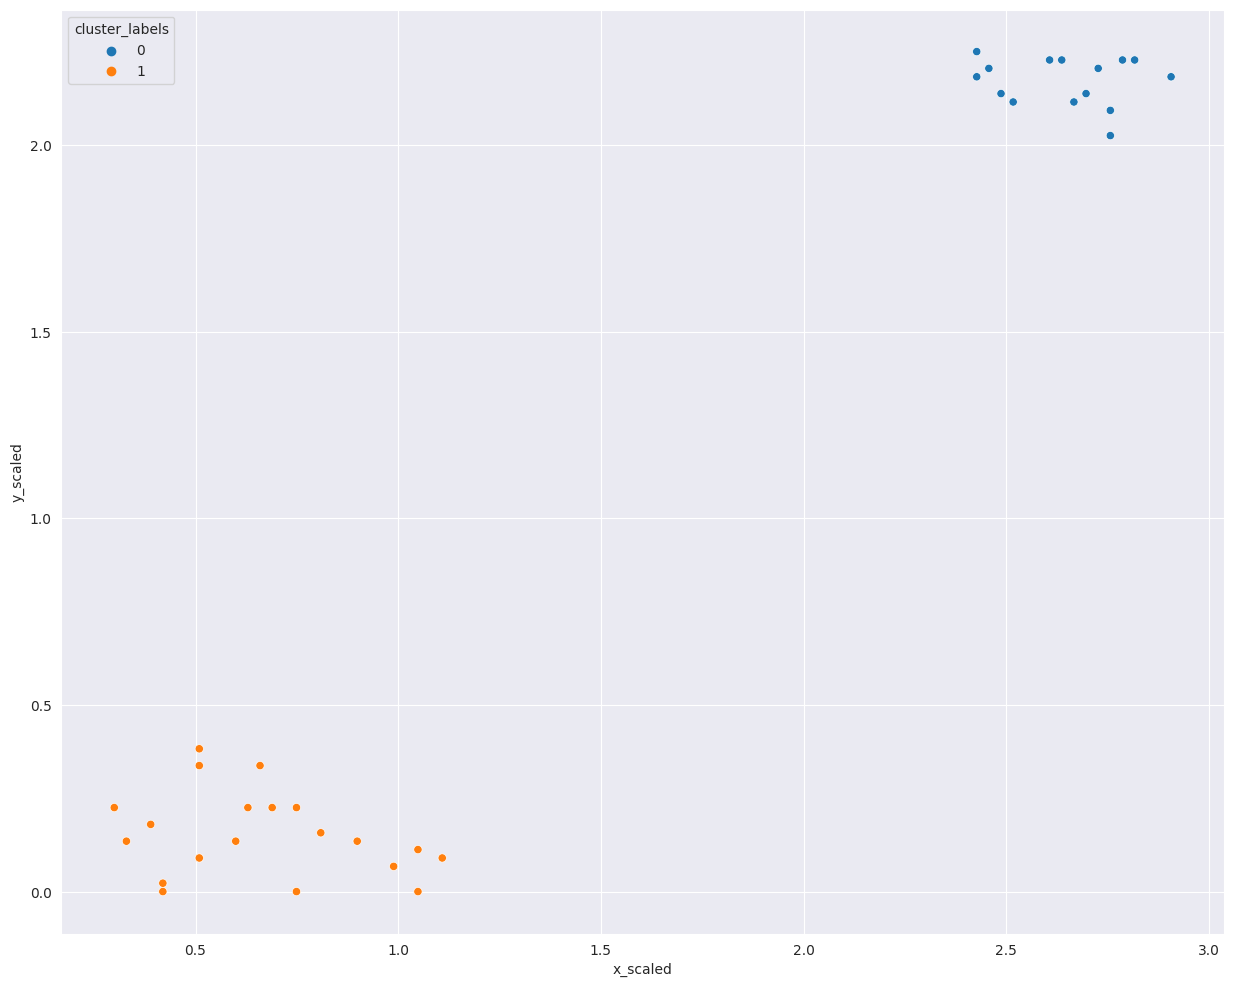

In [29]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']],2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

***Vous avez raison! Notez que les clusters formés sont exactement les mêmes que le clustering hiérarchique que vous avez fait dans le chapitre précédent.***

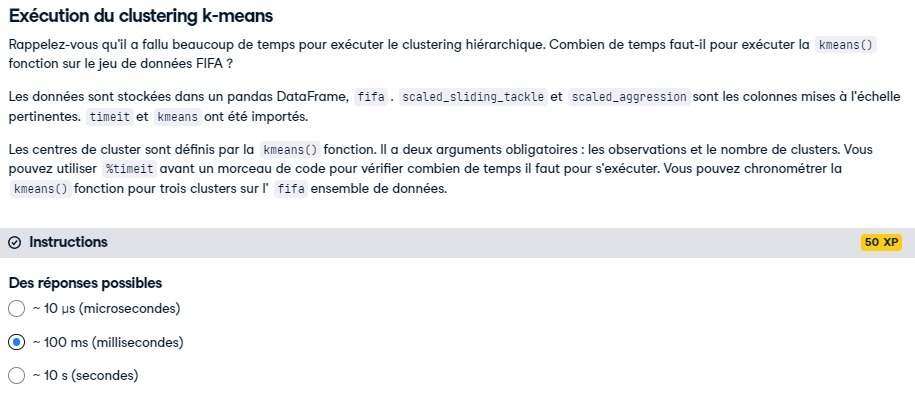

In [30]:
fifa = pd.read_csv('fifa_18_dataset.csv')
fifa.head()

,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [31]:
fifa['scaled_sliding_tackle'] = whiten(fifa['sliding_tackle'])
fifa['scaled_aggression'] = whiten(fifa['aggression'])

In [32]:
from scipy.cluster.hierarchy import linkage

%timeit linkage(fifa[['scaled_sliding_tackle', 'scaled_aggression']], method='ward')

13.6 s ± 1.79 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit kmeans(fifa[['scaled_sliding_tackle', 'scaled_aggression']], 2)

111 ms ± 2.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


***Vous avez raison. Il n'a fallu que quelques millisecondes pour exécuter le clustering k-means sur ces données.***

####**1. Combien de clusters ?**

+ ***Dans le chapitre précédent, nous avons analysé le dendrogramme pour déterminer combien de grappes étaient présentes dans les données. Cette vidéo parle d'une façon de déterminer le nombre de clusters dans le clustering k-means.***

####**2. Comment trouver le bon k ?**

+ ***Une critique du clustering k-means est qu'il n'y a pas de bonne façon de savoir combien de clusters existent dans votre ensemble de données. Il existe certaines méthodes indicatives, et ce chapitre traite de l'une d'entre elles : la construction d'un diagramme en coude pour décider du bon nombre de clusters pour votre jeu de données.***

####**3. Distorsions revisitées**

+ ***Rappelez-vous notre discussion sur les distorsions, La distorsion est la somme des carrés des distances entre chaque point de données et son centre de cluster. Idéalement, la distorsion a une relation inverse avec le nombre de clusters - ce qui signifie que la distorsion diminue avec l'augmentation du nombre de clusters. Cette tendance est intuitive - car la segmentation des données en fragments plus petits conduira à un rapprochement des clusters, entraînant une distorsion plus faible. C'est la logique sous-jacente de la méthode du coude, qui est un graphique linéaire entre le nombre de clusters et leurs distorsions correspondantes.***

####**4. Méthode du coude**

+ ***Nous exécutons d'abord le clustering k-means avec un nombre variable de clusters sur les données, et construisons un diagramme en coude, qui a le nombre de clusters sur l'axe des $x$ et la distorsion sur l'axe des $y$. Le nombre de clusters peut commencer de un au nombre de points de données. Le point idéal est celui au-delà duquel la distorsion diminue relativement moins en augmentant le nombre de clusters. Examinons le code et un exemple de graphique pour mieux comprendre comment procéder.***

####**5. Méthode du coude en Python**

+ ***Dans ce code, nous préparons les données pour construire un diagramme de coude. Pour ce faire, nous décidons d'abord de la plage du nombre de clusters pour lesquels nous souhaitons exécuter l'algorithme. Dans ce cas, les tailles de cluster vont de 2 à 6. Ensuite, nous collectons la distorsion de chaque exécution de la méthode k-means et traçons les deux listes à l'aide de seaborn. Nous exécutons la méthode des k-moyennes pour chaque cluster et collectons les distorsions correspondantes dans une liste pour une utilisation ultérieure. Dans la dernière étape, nous créons un DataFrame avec les distorsions pour chaque nombre de clusters et le traçons à l'aide de seaborn, avec le nombre de clusters sur l'axe $x$ et la distorsion sur l'axe $y$.***

####**6. Exemple de tracé de coude**

+ ***Il s'agit d'un exemple de tracé de coude. Vous remarquerez que la distorsion diminue fortement de 2 à 3 clusters, mais a une diminution très progressive avec une augmentation ultérieure du nombre de clusters. Le nombre idéal de clusters ici est donc de 3.***

####**7. Réflexions finales sur l'utilisation de la méthode du coude**

+ ***Avant de terminer cette vidéo, je tiens à souligner que la méthode du coude ne donne qu'une indication du nombre idéal de grappes. Parfois, cela peut être insuffisant pour trouver un k optimal. Par exemple, la méthode du coude échoue lorsque les données sont uniformément réparties. Il existe d'autres méthodes pour trouver le nombre optimal de clusters telles que les méthodes de silhouette moyenne et de statistique d'écart. Ce sont également des méthodes indicatives et ne seront pas abordées dans le cadre de ce cours.***

####**8. Ensuite : exercices**

+ ***Maintenant que vous savez utiliser la méthode du coude pour déterminer le nombre de clusters, passons à quelques exercices pour trouver le nombre optimal de clusters.***

###**EXERCICES**

####**Méthode du coude sur des grappes distinctes**

+ ***Utilisons l'ensemble de données de la bande dessinée pour voir à quoi ressemble le tracé du coude sur un ensemble de données avec des clusters distincts et bien définis. Vous pouvez afficher les points de données avant de poursuivre l'exercice.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné.*

####**Consignes**

+ Créez une liste de distorsions pour chaque cluster dans num_clusters.
+ Créez un DataFrame elbow_plot avec num_clusters et distortions.
+ Avec la méthode .lineplot(), tracez elbow_plot avec num_clustersdans l'axe des $x$ et distortions dans l'axe des $y$.

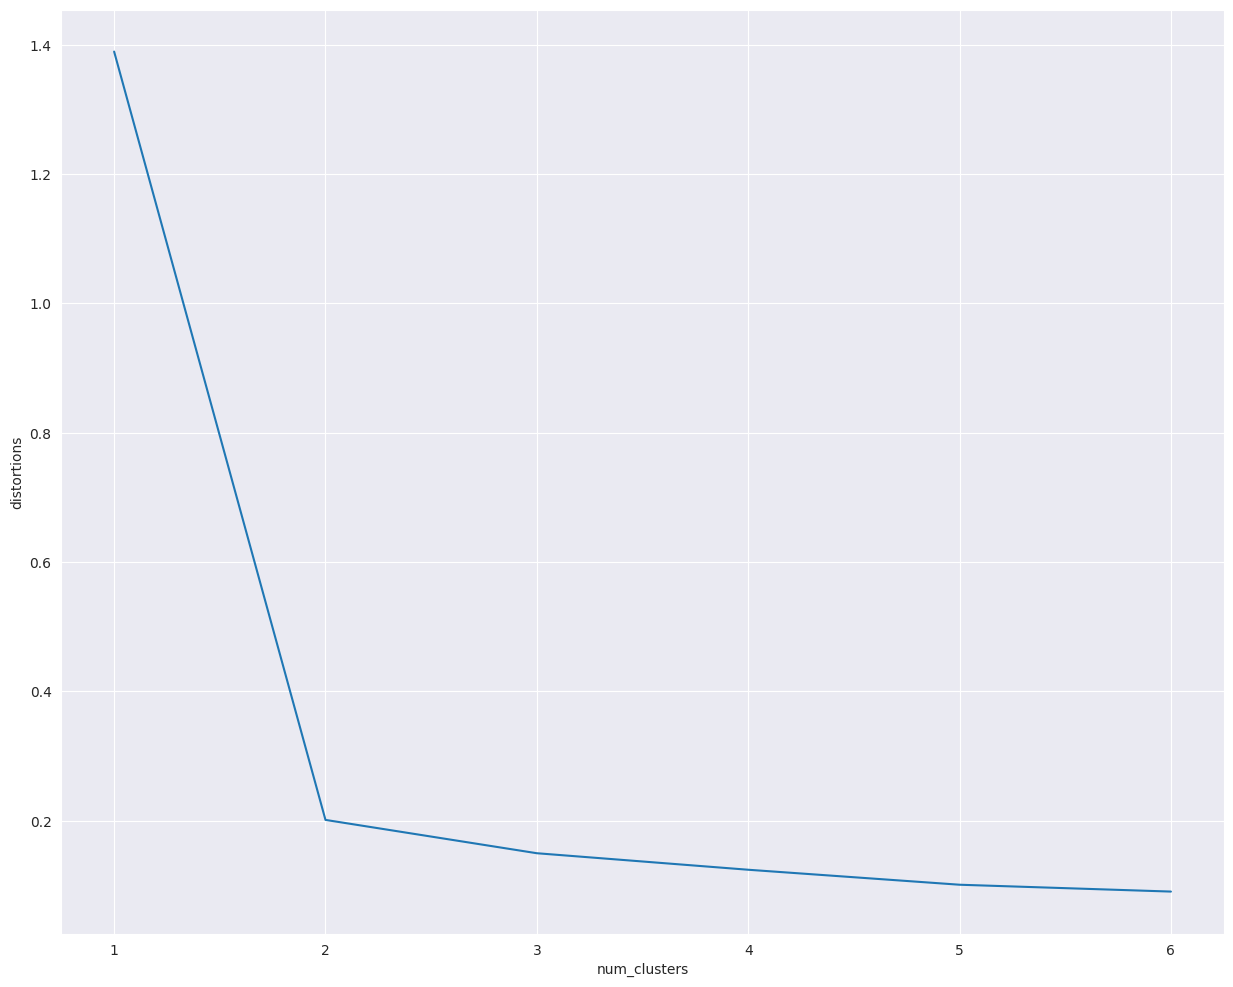

In [34]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters , 'distortions':distortions })

# Creat a line plot of num_clusters and distortions
plt.figure(figsize=(15,12))
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

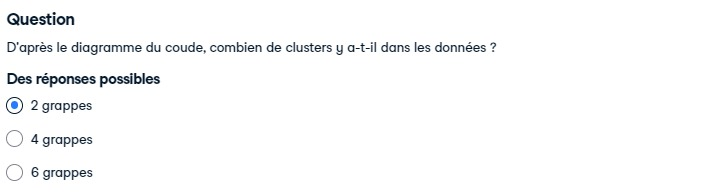

***Vous avez raison.***

####**Méthode du coude sur des données uniformes**
+ ***Dans l'exercice précédent, vous avez construit un diagramme de coude sur des données avec des clusters bien définis. Voyons maintenant à quoi ressemble le tracé du coude sur un ensemble de données avec des points uniformément répartis. Vous souhaiterez peut-être afficher les points de données dans le shell IPython avant de poursuivre l'exercice.***

+ ***Les données sont stockées dans un pandas DataFrame, uniform_data. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des points.***

####**Consignes**

+ Créez une liste de distorsions pour chaque cluster dans num_clusters.
+ Créez un DataFrame elbow_plot avec num_clusters et distortions.
+ Avec la méthode .lineplot(), tracez elbow_plot avec num_clusters dans l'axe des $x$ et distortions dans l'axe des $y$.

In [35]:
uniform_data = pd.read_csv('uniform_data.csv', index_col=0)
uniform_data.head()

,x_coordinate,y_coordinate
0,39,3
1,42,7
2,58,3
3,43,3
4,13,6


In [36]:
uniform_data['x_scaled'] = whiten(uniform_data['x_coordinate'])
uniform_data['y_scaled'] = whiten(uniform_data['y_coordinate'])

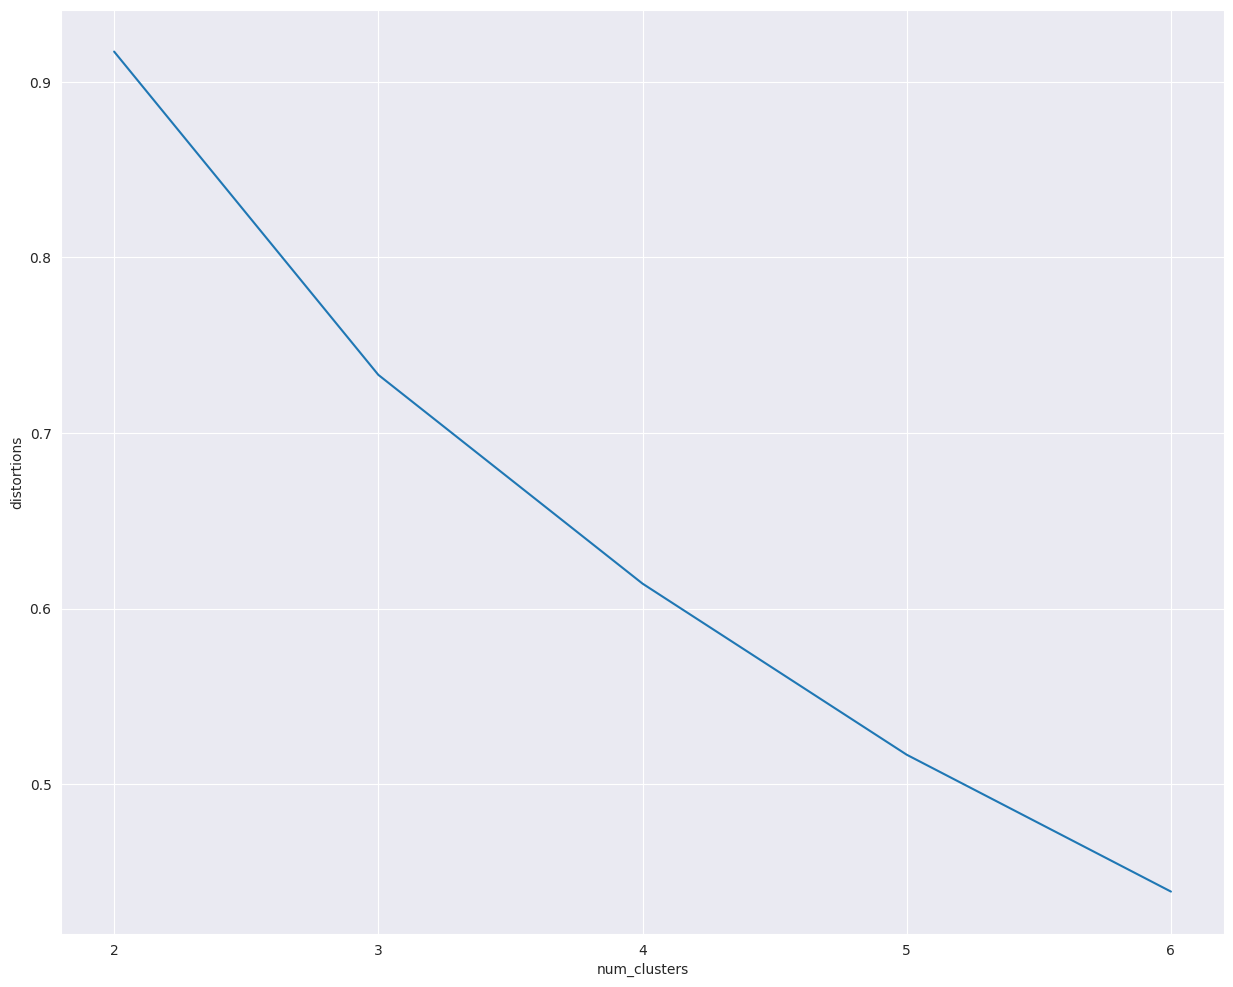

In [38]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(uniform_data[['x_scaled','y_scaled']],i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
plt.figure(figsize=(15,12))
sns.lineplot(x='num_clusters', y='distortions', data= elbow_plot)
plt.xticks(num_clusters)
plt.show()

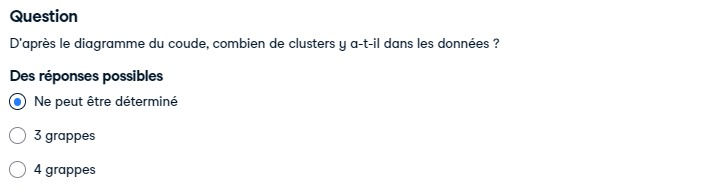

***Vous avez raison. Il n'y a pas de coude bien défini dans ce complot !***

####**1. Limites du clustering k-means**

+ ***Vous avez appris le clustering k-means dans SciPy dans les exercices précédents. Nous allons maintenant nous concentrer sur les limites de cette méthode de clustering et sur la manière dont vous devez procéder avec prudence lors de l'utilisation du clustering k-means.***

####**2. Limites du clustering k-means**

+ ***Plus tôt, nous avons vu que le clustering k-means surmonte le plus gros inconvénient du clustering hiérarchique, le temps d'exécution. Cependant, il est livré avec son propre ensemble de limitations que vous devez prendre en compte lors de son utilisation. Le premier problème est la procédure pour trouver le bon nombre de clusters, k. Comme indiqué précédemment, la méthode du coude est l'un des moyens de déterminer le bon k, mais peut ne pas toujours fonctionner. La prochaine limitation du clustering k-means est l'impact des graines sur le clustering, que nous explorerons sous peu. La dernière limite que nous allons explorer est la formation de clusters de taille égale.***

####**3. Impact des semences**

+ ***Regardons l'impact des graines sur les grappes résultantes. Comme le processus de définition des centres de clusters initiaux est aléatoire, cette initialisation peut affecter les clusters finaux. Par conséquent, pour obtenir des résultats cohérents lors de l'exécution de k-means clustering sur le même jeu de données plusieurs fois, il est judicieux de définir les paramètres d'initialisation pour la génération de nombres aléatoires. La graine est initialisée via la méthode seed de la classe aléatoire dans numpy. Vous pouvez passer un seul entier ou un tableau 1D comme argument. Voyons les résultats du clustering k-means lorsque nous passons deux graines différentes avant d'exécuter l'algorithme. Aux fins des tests, nous prenons une liste de 200 points générés aléatoirement et utilisons cinq groupes. On voit que dans les deux cas les tailles des clusters sont différentes. Voyons les parcelles.***

####**4. Impact des semences : parcelles**

+ ***Voici les graphiques pour comparer les clusters résultants. Vous remarquerez que de nombreux points le long des limites des clusters ont des clusters échangés. Fait intéressant, l'effet des graines n'est visible que lorsque les données à regrouper sont assez uniformes. Si les données ont des clusters distincts avant que le clustering ne soit effectué, l'effet des graines n'entraînera aucun changement dans la formation des clusters résultants.***

####**5. Clusters uniformes en k moyens**

+ ***Pour illustrer le biais dans le clustering kmeans vers des clusters uniformes pour minimiser la variance, effectuons un clustering sur cet ensemble de 280 points, divisés en groupes non uniformes de 200, 70 et 10. Graphiquement, ils semblent distinctement séparés en trois clusters. Par conséquent, si nous exécutons un algorithme de clustering, ces trois clusters doivent être sélectionnés. Testons d'abord cette théorie avec le clustering kmeans.***

####**6. Clusters uniformes en k-means : une comparaison**

+ ***Si vous regardez les résultats du clustering k-means sur cet ensemble de données, vous obtenez des clusters non intuitifs même après avoir fait varier les graines. En effet, l'idée même du clustering k-means est de minimiser les distorsions. Cela se traduit par des clusters qui ont des zones similaires et pas nécessairement le même nombre de points de données. Cependant, lorsque vous examinez les résultats du clustering hiérarchique sur le même ensemble de données en utilisant la méthode complète pour décider de la proximité des clusters, vous remarquerez que les clusters formés sont intuitifs et cohérents avec notre hypothèse de la diapositive précédente.***

####**7. Réflexions finales**

+ ***Enfin, nous réalisons que chaque technique a ses avantages et ses inconvénients, et vous devez connaître les hypothèses sous-jacentes de chaque technique avant de les appliquer. Idéalement, vous devriez passer du temps à réfléchir à la taille de vos données, à leurs modèles, aux ressources et au temps dont vous disposez avant de finaliser un algorithme. N'oubliez pas que le regroupement est toujours la phase exploratoire de votre analyse - il convient parfaitement à quelques essais et erreurs à ce stade.***

####**8. Ensuite : exercices**

+ ***Travaillons maintenant sur quelques exercices.***


###**EXERCICES**

####**Impact des semences sur des clusters distincts**
+ ***Vous avez remarqué l'impact des graines sur un jeu de données qui n'avait pas de groupes de clusters bien définis. Dans cet exercice, vous explorerez si les graines ont un impact sur les clusters dans les données Comic Con, où les clusters sont bien définis.***

+ *Les données sont stockées dans un pandas DataFrame, comic_con. x_scaled et y_scaled sont les noms de colonne des coordonnées normalisées $X$ et $Y$ des personnes à un moment donné.*

####**Consignes**

+ Importez la classe random à partir de numpy et initialisez la graine avec l'entier 0.

+ Modifiez votre code de l'étape précédente afin que la graine soit initialisée avec une liste [1, 2, 1000].

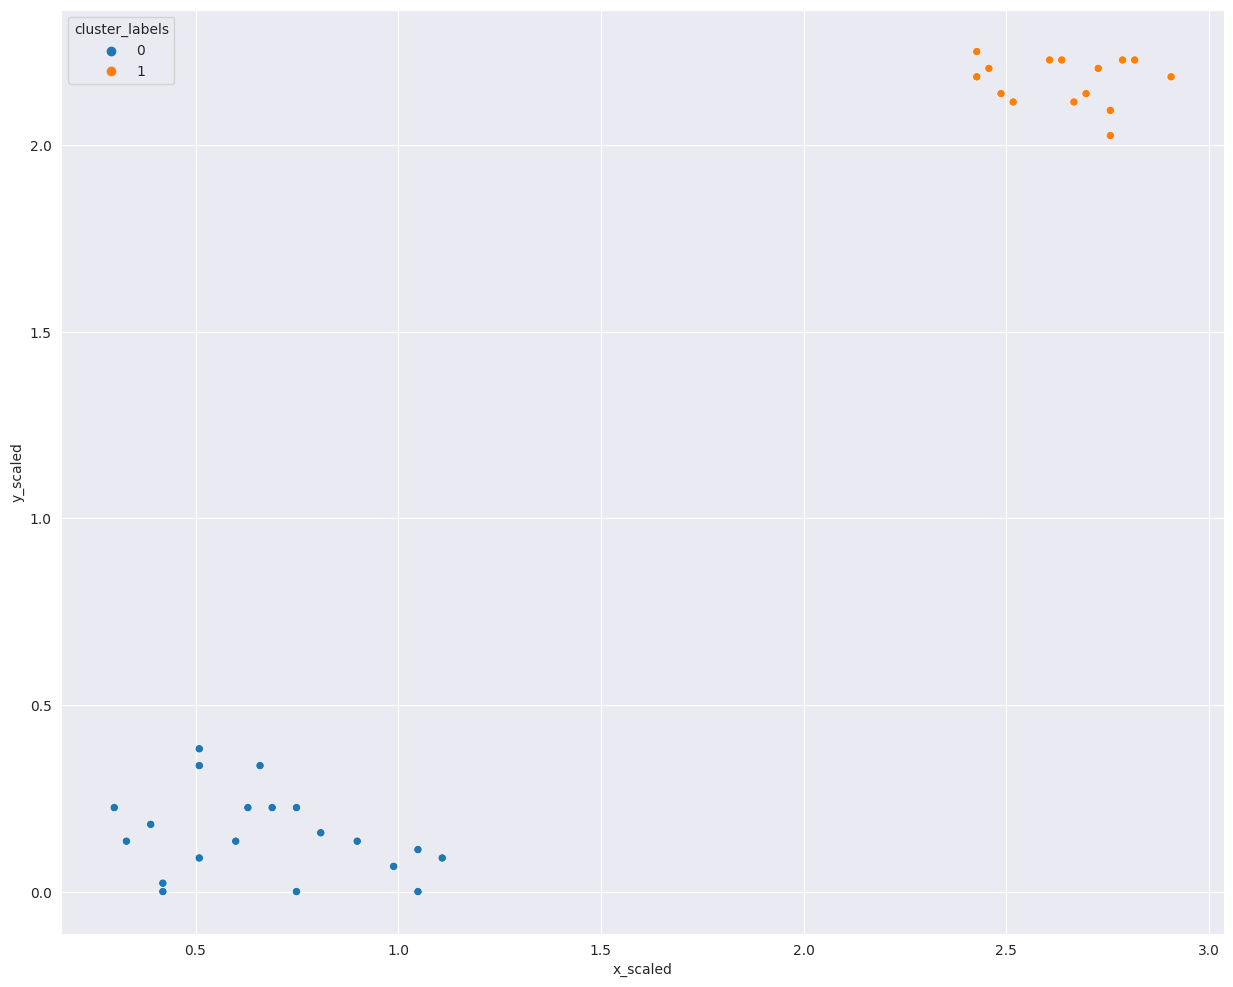

In [39]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

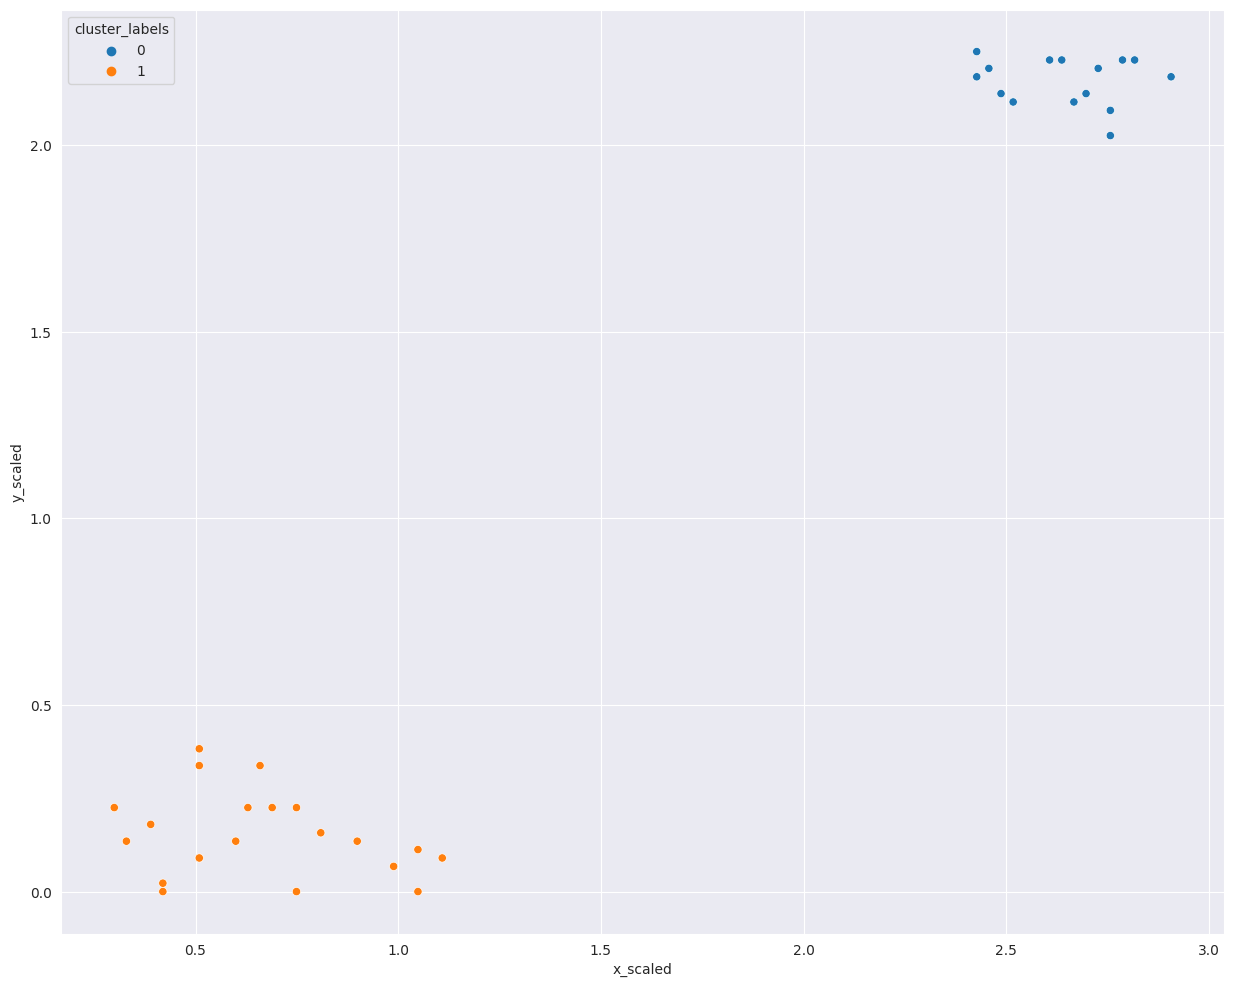

In [40]:
# Import random class
from numpy import random

# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = comic_con)
plt.show()

***Vous avez raison! Notez que les parcelles n'ont pas changé après avoir changé la graine car les grappes sont bien définies.***

####**Modèles de regroupement uniformes**

+ ***Maintenant que vous êtes familiarisé avec l'impact des graines, examinons le biais du clustering k-means vers la formation de clusters uniformes.***

+ ***Utilisons un ensemble de données de type souris pour notre prochain exercice. Un ensemble de données de type souris est un groupe de points qui ressemblent à la tête d'une souris : il comporte trois groupes de points disposés en cercles, un pour le visage et deux pour les oreilles d'une souris.***

+ *Voici à quoi ressemble un jeu de données type souris ( [Source](https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655)).*

<img src="https://assets.datacamp.com/production/repositories/3842/datasets/fa03a65258018a0c945528a987cdd250010de1ee/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids.ppm"/>

+ *Les données sont stockées dans un pandas DataFrame, mouse. x_scaled et y_scaled sont les noms de colonne des coordonnées $X$ et $Y$ normalisées des points de données.*

####**Instructions**

+ Importation des fonctions kmeans et vq dans SciPy.
Générez des centres de cluster à l'aide de la fonction kmeans() avec trois clusters.
+ Créez des étiquettes de cluster avec vq() les centres de cluster générés ci-dessus.

In [41]:
mouse = pd.read_csv('mouse.csv', index_col=0)
mouse.head()

,x_coordinate,y_coordinate
0,33.875528,44.893421
1,38.208748,41.116327
2,35.740588,57.418006
3,32.546963,57.218082
4,62.063146,47.196944


In [42]:
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

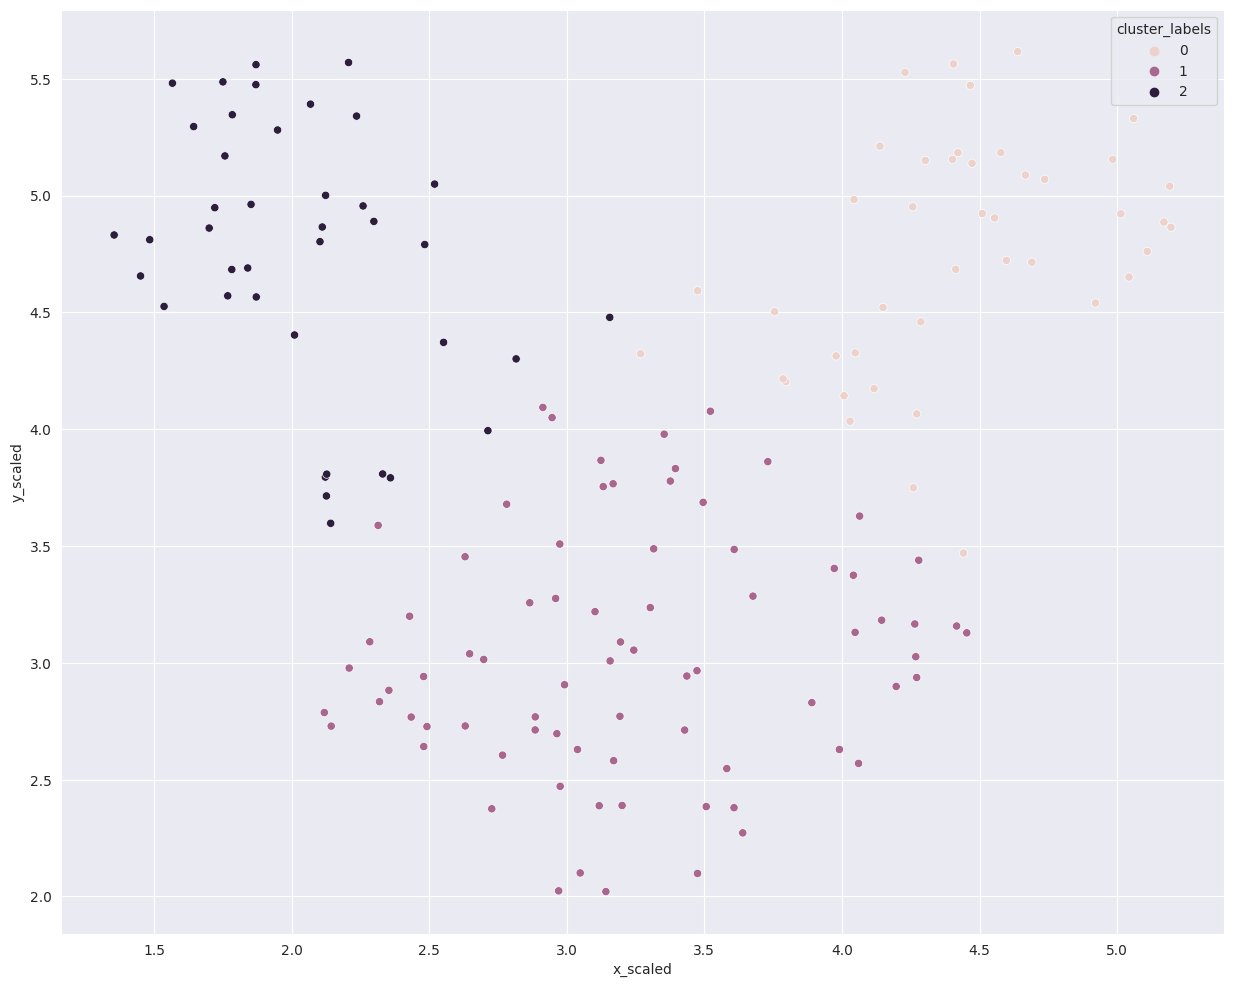

In [43]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled','y_scaled']],3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled','y_scaled']], cluster_centers)

# Plot clusters
plt.figure(figsize=(15,12))
sns.scatterplot(x='x_scaled', y='y_scaled',
                hue='cluster_labels', data = mouse)
plt.show()

***Vous avez raison! Notez que kmeans est incapable de capturer clairement les trois clusters visibles, et les deux clusters vers le haut ont pris certains points le long de la frontière. Cela se produit en raison de l'hypothèse sous-jacente de l'algorithme kmeans pour minimiser les distorsions, ce qui conduit à des clusters similaires en termes de surface.***

####**FIFA 18 : les défenseurs revisités**
+ ***Dans l'ensemble de données FIFA 18, divers attributs de joueurs sont présents. Deux de ces attributs sont :***

  + défendant : un nombre qui signifie les attributs de défense d'un joueur
  + physique : un nombre qui signifie les attributs physiques d'un joueur

+ Ce sont généralement des joueurs à l'esprit défensif. Dans cet exercice, vous allez effectuer un clustering basé sur ces attributs dans les données.

+ *Les modules suivants ont été préchargés : kmeans, vq de scipy.cluster.vq, matplotlib.pyplot as plt, seaborn as sns. Les données de cet exercice sont stockées dans un pandas DataFrame, fifa. Les variables mises à l'échelle sont scaled_def et scaled_phy.*

####**Consignes**

+ Initialise la graine aléatoire dans la liste [1000,2000].
+ Ajustez les données mises à l'échelle dans les colonnes scaled_def et scaled_phy dans un algorithme de clustering k-means avec 3 clusters et attribuez des étiquettes de cluster.
+ Afficher les centres de cluster de chaque cluster par rapport aux colonnes mises à l'échelle en calculant la valeur moyenne pour chaque cluster.
+ Créez un nuage de points seaborn avec scaled_def sur l'axe des $x$ et scaled_phy sur l'axe des $y$, chaque cluster étant représenté par une couleur différente.

In [44]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [45]:
fifa = fifa[['def', 'phy']].copy()
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])

In [46]:
# Set up a random seed in numpy
random.seed([1000,2000])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'], _ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


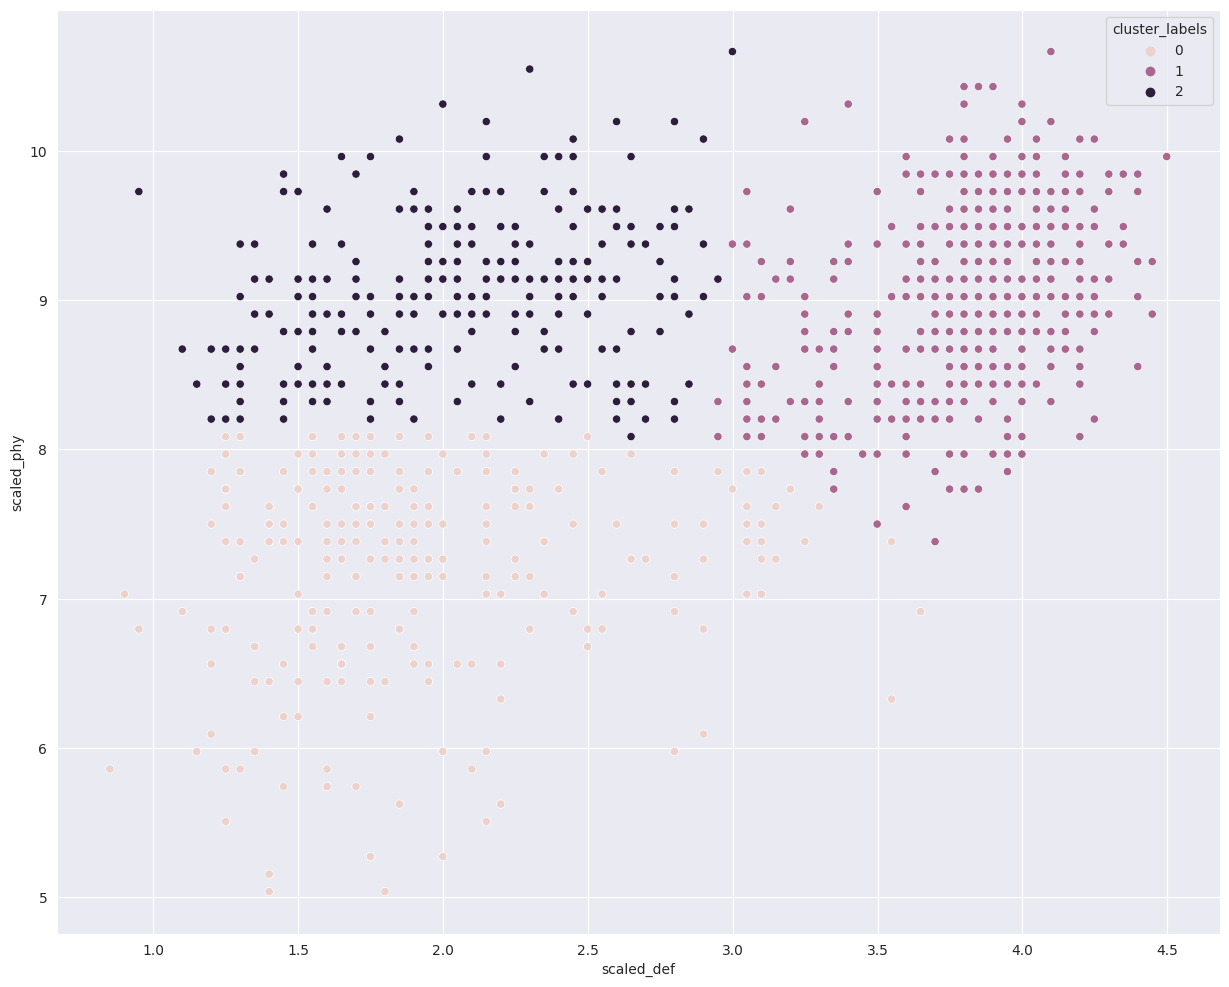

In [47]:
# Create a scatter plot through seaborn
plt.figure(figsize=(15,12))
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

***Tu as raison! Notez que la graine a un impact sur le clustering car les données sont uniformément distribuées.***

####**1. Couleurs dominantes dans les images**

+ ***Dans le dernier chapitre de ce cours, essayons d'utiliser le clustering sur des problèmes du monde réel. Dans cette première vidéo, nous allons analyser des images pour déterminer les couleurs dominantes.***

####**2. Couleurs dominantes dans les images**

+ ***Toute image est constituée de pixels, chaque pixel représente un point dans l'image. Un pixel se compose de trois valeurs - chaque valeur est un nombre compris entre 0 et 255, représentant la quantité de ses composants rouge, vert et bleu. La combinaison de ceux-ci forme la couleur réelle du pixel. Pour trouver les couleurs dominantes, nous allons effectuer un clustering k-means, avec ses composantes RVB. Une utilisation importante du regroupement k-means sur les images consiste à segmenter les images satellites pour identifier les caractéristiques de surface.***

####**3. Identification des caractéristiques dans les images satellites**

+ ***Sur cette image satellite, vous pouvez voir le relief d'une vallée fluviale. Différentes couleurs appartiennent généralement à différentes caractéristiques. Le regroupement K-means peut être utilisé pour les regrouper en groupes, qui peuvent ensuite être identifiés dans diverses caractéristiques de surface comme l'eau et la végétation.***

####**4. Outils pour trouver les couleurs dominantes**

+ ***Il existe deux méthodes supplémentaires qui vous seront présentées dans cette vidéo, qui font partie de la classe d'image de matplotlib. La première est la méthode imread, qui convertit une image JPEG en une matrice contenant les valeurs RVB de chaque pixel. La deuxième méthode est la méthode imshow qui afficherait les couleurs des centres de cluster une fois que vous avez effectué un clustering k-means sur les valeurs RVB.***

####**5. Image d'essai**

+ ***Dans cette vidéo, effectuons un clustering k-means sur cette image de la mer. Notez qu'il y a deux couleurs dominantes dans l'image - une couleur bleu-vert de l'eau de mer et un ciel bleu clair.***

####**6. Convertir l'image en matrice RVB**

+ ***La première étape du processus consiste à convertir l'image en pixels à l'aide de la méthode imread de la classe image. Notez que la sortie de cette fonction est une matrice MxNx3, où M et N sont les dimensions de l'image. Dans cette analyse, nous allons examiner collectivement tous les pixels, et leur position n'aurait pas d'importance, par conséquent, nous allons simplement extraire toutes les valeurs RVB et les stocker dans leurs listes correspondantes.***

####**7. DataFrame avec des valeurs RVB**

+ ***Une fois les listes créées, nous les stockons dans un pandas DataFrame.***

####**8. Créer un tracé de coude**

+ ***Voici le code pour créer un tracé de coude du dernier chapitre.***

####**9. Courbe du coude**

+ ***Une fois que nous avons mis à l'échelle les valeurs RVB de la liste de pixels, nous créons le tracé du coude pour voir combien de couleurs dominantes sont présentes dans l'image. Notez que le tracé du coude indique deux groupes, ce qui confirme notre observation initiale de deux couleurs proéminentes dans l'image.***

####**10. Trouvez les couleurs dominantes**

+ ***Les centres de cluster obtenus sont des valeurs RVB normalisées. Rappelons qu'une valeur normalisée d'une variable est sa valeur réelle divisée par l'écart type. Nous afficherions les couleurs via la méthode imshow, qui prend des valeurs RVB qui ont été mises à l'échelle dans la plage de 0 à 1. Pour ce faire, nous devons multiplier les valeurs standardisées des centres de cluster avec leurs écarts-types correspondants. Nous avons vu précédemment que les valeurs RVB réelles prennent la valeur maximale de 255, nous la divisons donc par 255 pour obtenir une valeur mise à l'échelle dans la plage de 0-1.***

####**11. Affichez les couleurs dominantes**

+ ***Une fois que nous avons les couleurs avec leurs valeurs RVB, la méthode imshow est utilisée pour les afficher. Notez que vous devez fournir la variable colors encapsulée sous forme de liste, car la méthode imshow s'attend à ce qu'une matrice $MxNx3$ affiche une grille 2D de couleurs. En faisant cela, nous fournissons une matrice 1xNx3, qui indique à la méthode imshow d'afficher une seule ligne de couleurs, où $N$ est le nombre de clusters. Voici les deux couleurs dominantes, ce qui conforte nos observations préliminaires.***

####**12. Ensuite : exercices**

+ ***Passons maintenant aux exercices.***

###**EXERCICES**

####**Extraire les valeurs RVB de l'image**
+ ***Il y a globalement trois étapes pour trouver les couleurs dominantes dans une image :***

  + ***Extrayez les valeurs RVB dans trois listes.***
  + ***Effectuez un clustering k-means sur des valeurs RVB mises à l'échelle.***
  + ***Afficher les couleurs des centres de cluster.***


+ Pour extraire les valeurs RVB, nous utilisons la fonction `imread()` de la classe image de matplotlib. Les listes vides, $r$, $g$ et $b$ ont été initialisées.

+ *Afin de trouver les couleurs dominantes, nous utiliserons l'image suivante.*

<img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg"/>

####**Instructions**

+ Classe image d'importation de matplotlib.
+ Lisez l'image à l'aide de la fonction imread() et imprimez les dimensions de la matrice résultante.
+ Enregistrez les valeurs des trois couleurs de tous les pixels dans des listes $r$, $g$ et $b$.

In [48]:
import matplotlib.image as img

r = []
g = []
b = []

# Read batman image and print dimensions
batman_image = img.imread('batman.jpg')
print(batman_image.shape)

(169, 269, 3)


In [49]:
# Store RGB values of all pixels in lists r, g, and b
for row in batman_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

***C'est exact ! Vous avez réussi à extraire les valeurs RVB de l'image dans trois listes, une pour chaque canal de couleur.***

####**Combien de couleurs dominantes ?**
+ ***Nous avons chargé l'image suivante en utilisant la fonction imread() de la classe image de matplotlib.***

<img src = "https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg"/>

+ ***Les valeurs RVB sont stockées dans un DataFrame, batman_df. Les valeurs RVB ont été normalisées à l'aide de la fonction whiten(), stockées dans des colonnes scaled_red, scaled_blue et scaled_green.***

+ *Construisez un tracé de coude avec le DataFrame. Combien de couleurs dominantes sont présentes ?*

####**Instructions**

+ Créez une liste de distorsions en fonction de chaque valeur en num_clusters exécutant la fonction kmeans().
+ Créez un DataFrame elbow_plot avec les listes :
  + num_clusters et distortions.
+ Tracez les données avec la méthode seaborn de .lineplot() avec num_clusters sur l'axe des $x$ et distortions sur l'axe des $y$.



In [50]:
from scipy.cluster.vq import whiten

batman_df = pd.DataFrame({'red':r, 'blue':b, 'green':g})
batman_df['scaled_red'] = whiten(batman_df['red'])
batman_df['scaled_blue'] = whiten(batman_df['blue'])
batman_df['scaled_green'] = whiten(batman_df['green'])

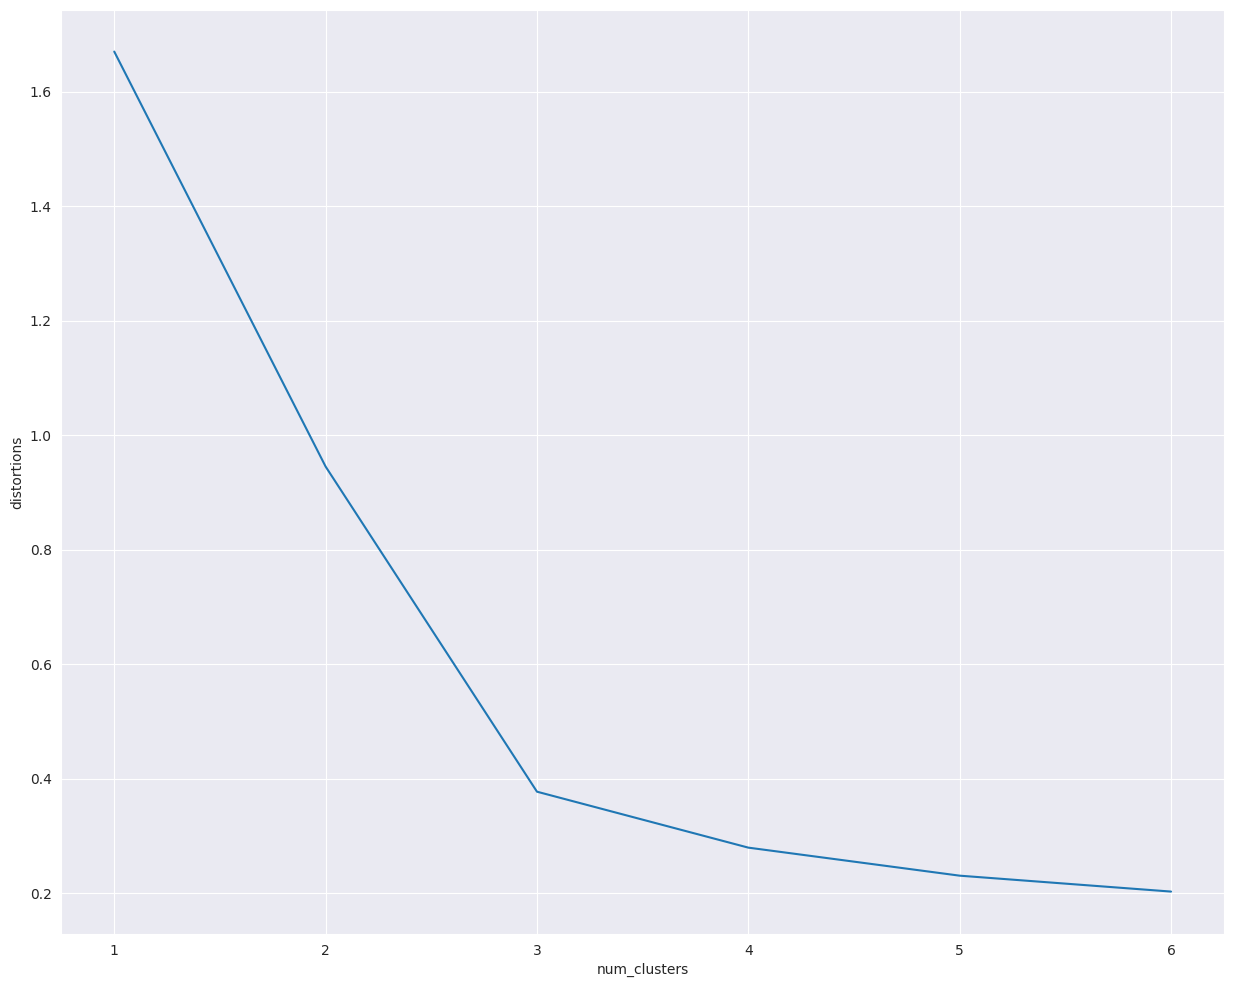

In [51]:
from scipy.cluster.vq import kmeans

distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(batman_df[['scaled_red','scaled_blue', 'scaled_green']], i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions':distortions})

# Create a line plot of num_clusters and distortions
plt.figure(figsize=(15,12))
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

***Tu as raison! Notez qu'il y a trois couleurs distinctes présentes dans l'image, qui sont prises en charge par le tracé du coude.***

####**Afficher les couleurs dominantes**
+ ***Nous avons chargé l'image suivante en utilisant la fonction `imread()` de la classe image de matplotlib.***

<img src="https://assets.datacamp.com/production/repositories/3842/datasets/57d0d6d409bfd543e86c7f7398239fa0722e9b48/batman.jpg"/>

+ Pour afficher les couleurs dominantes, convertissez les couleurs des centres de cluster en leurs valeurs brutes, puis convertissez-les dans la plage de 0 à 1, à l'aide de la formule suivante :

      converted_pixel = standardized_pixel * pixel_std / 255

+ *Les valeurs RVB sont stockées dans un DataFrame, batman_df. Les valeurs RVB mises à l'échelle sont stockées dans les colonnes scaled_red, scaled_blue et scaled_green. Les centres de cluster sont stockés dans la variable cluster_centers, qui ont été générés à l'aide de la fonction kmeans() à trois clusters.*

####**Instructions**

+ Obtenez les écarts-types de chaque couleur à partir du DataFrame et stockez-les dans r_std, g_std, b_std.
+ Pour chaque centre de cluster, convertissez les valeurs RVB normalisées en valeurs mises à l'échelle dans la plage de 0 à 1.
+ Affichez les couleurs des centres de cluster.

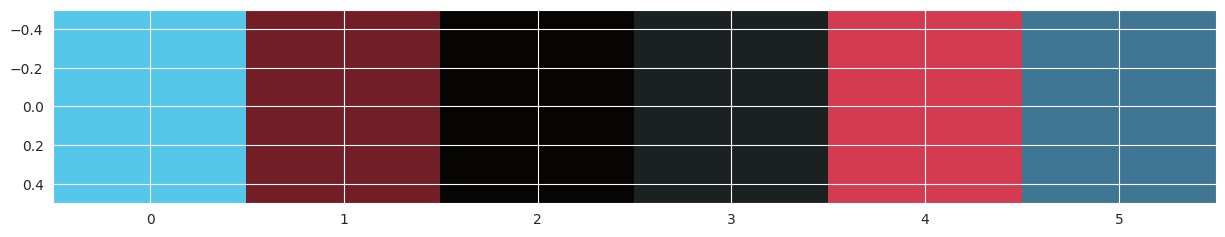

In [53]:
colors = []

# Get standard deviations of each color
r_std, g_std, b_std = batman_df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))

# Display colors of cluster centers
plt.figure(figsize=(15,12))
plt.imshow([colors])
plt.show()

***C'est exact ! Remarquez que les trois couleurs ressemblent aux trois qui sont indicatives de l'inspection visuelle de l'image.***

####**1. Regroupement de documents**

+ ***Dans la leçon d'introduction, nous avons discuté de l'utilisation de techniques d'apprentissage non supervisé pour regrouper des articles d'actualité par un service tel que Google Actualités. Cette technique, connue sous le nom de regroupement de documents, sera explorée dans cette vidéo.***

####**2. Regroupement de documents : concepts**

+ ***Le regroupement de documents utilise certains concepts du traitement du langage naturel, ou NLP. Bien que le NLP soit un vaste sujet, essayons de comprendre ses bases à appliquer dans ce cas d'utilisation. Tout d'abord, nous allons nettoyer les données pour tout ce qui n'ajoute pas de valeur à notre analyse. Certains éléments à supprimer incluent la ponctuation, les émoticônes et les mots tels que "le, est, sont". Ensuite, nous trouvons le TF-IDF des termes, ou une statistique pondérée qui décrit l'importance d'un terme dans un document. Enfin, nous regroupons la matrice TF-IDF et affichons les principaux termes de chaque cluster.***

####**3. Nettoyer et tokeniser les données**

+ ***Le texte en lui-même ne peut pas être analysé avant d'être converti en parties plus petites appelées jetons, ce que nous réalisons en utilisant la méthode word_tokenize de NLTK. Tout d'abord, nous supprimons tous les caractères spéciaux des jetons et vérifions s'ils contiennent des mots vides. Enfin, nous retournons les jetons nettoyés. Voici la sortie d'un exemple de citation du film Pink Panther.***

####**4. Documenter la matrice de termes et les matrices creuses**

+ ***Une fois les termes pertinents extraits, une matrice est formée, avec les termes et les documents comme dimensions. Un élément de la matrice signifie combien de fois un terme est apparu dans chaque document. La plupart des éléments sont des zéros, par conséquent, des matrices creuses sont utilisées pour stocker ces matrices plus efficacement. Une matrice creuse ne contient que des termes qui ont des éléments non nuls.***

####**5. TF-IDF (fréquence du terme - fréquence inverse du document)**

+ ***Pour trouver le TF-IDF des termes dans un groupe de documents, nous utilisons la classe TfidfVectorizer de sklearn. Nous l'initialisons avec les fonctionnalités suivantes : max_df et min_df signifient la fraction maximale et minimale de documents dans lesquels un mot doit apparaître - ici, nous continuons avec les termes qui apparaissent dans plus de 20 % mais moins de 80 % des documents. Nous gardons les 50 premiers termes. Enfin, nous utilisons notre fonction personnalisée comme tokenizer. La méthode fit_transform crée la matrice TF-IDF pour les données, qui est une matrice creuse.***

####**6. Clustering avec matrice clairsemée**

+ ***kmeans dans scipy ne fonctionne pas avec des matrices creuses, nous convertissons donc la matrice tfidf en sa forme développée en utilisant la méthode todense. kmeans peut ensuite être appliqué pour obtenir les centres de cluster. Nous n'utilisons pas le diagramme du coude, car il prendra une forme erratique en raison du nombre élevé de variables.***

####**7. Principaux termes par cluster**

+ ***Chaque centre de cluster est une liste de poids tfidf, ce qui signifie l'importance de chaque terme dans la matrice. Pour trouver les principaux termes, nous créons d'abord une liste de tous les termes. Ensuite, nous créons un dictionnaire avec les termes sont des clés et tfidf comme valeurs. Nous trions ensuite le dictionnaire par ses valeurs dans l'ordre décroissant et affichons les principaux termes. La méthode zip joint deux listes en python. Nous analysons une liste de 1000 avis d'hôtels pour constater que les principaux termes dans l'un des groupes étaient la chambre, l'hôtel et le personnel, tandis que l'autre groupe avait mauvais, emplacement et petit-déjeuner comme principaux termes.***

####**8. Plus de considérations**

+ ***En raison de la portée du cours, nous avons vu une forme simple de regroupement de documents. Il y a plus de considérations en ce qui concerne la PNL. Par exemple, vous pouvez modifier la méthode remove_noise pour filtrer les hyperliens ou remplacer les émoticônes par du texte. Vous pouvez normaliser chaque mot à sa forme de base : par exemple, run, run et running sont les formes du même verbe run. De plus, la méthode todense peut ne pas fonctionner avec de grands ensembles de données et vous devrez peut-être envisager une implémentation de k-means qui fonctionne avec des matrices creuses.***

####**9. Ensuite : exercices !**

+ ***Essayons maintenant de regrouper les films en fonction de leurs synopsis.***



###**EXERCICES**
####**TF-IDF d'intrigues de films**


+ ***Utilisons les tracés de films sélectionnés au hasard pour effectuer un regroupement de documents. Avant d'effectuer le regroupement sur des documents, ils doivent être nettoyés de tout bruit indésirable (tel que des caractères spéciaux et des mots vides) et convertis en une matrice clairsemée via TF-IDF des documents.***

+ ****Utilisez la TfidfVectorizerclasse pour effectuer le TF-IDF des tracés de film stockés dans la listeplots . La fonction remove_noise() est disponible pour être utilisée comme tokenizerdans la TfidfVectorizerclasse. La méthode .fit_transform() adapte les données dans les objets TfidfVectorizer, puis génère la matrice creuse TF-IDF.***

+ *Remarque : Il faut quelques secondes pour exécuter le.fit_transform() .*

####**Instructions**

+ Importer une classe TfidfVectorizer depuis sklearn.
+ Initialisez la classe TfidfVectorizer avec des fréquences minimales et maximales de 0,1 et 0,75, et 50 caractéristiques maximales.
+ Utilisez la méthode fit_transform() sur la classe TfidfVectorizer initialisée avec les tracés de liste.


In [54]:
movie = pd.read_csv('movies_plot.csv')
movie.head()

,Title,Plot
0,The Ballad of Cable Hogue,"Cable Hogue is isolated in the desert, awaitin..."
1,Monsters vs. Aliens,"In the far reaches of space, a planet explodes..."
2,The Bandit Queen,Zarra Montalvo is the daughter of an American ...
3,Broken Arrow,Major Vic Deakins (John Travolta) and Captain ...
4,Dolemite,Dolemite is a pimp and nightclub owner who is ...


In [55]:
plots = movie['Plot'].values

In [56]:
from nltk.tokenize import word_tokenize
import re

import nltk
nltk.download('punkt')

def remove_noise(text, stop_words = []):
    tokens = word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub('[^A-Za-z0-9]+', '', token)
        if len(token) > 1 and token.lower() not in stop_words:
            # Get lowercase
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Import TfidfVectorizer class from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.75, max_features=50, min_df=0.1, tokenizer=remove_noise)

# Use the .fit_transform() method on the list plots
tfidf_matrix = tfidf_vectorizer.fit_transform(plots)

***C'est exact ! Vous avez créé avec succès la matrice creuse. Effectuons maintenant le clustering sur la matrice.***

####**Principaux termes dans les clusters de films**
+ ***Maintenant que vous avez créé une matrice creuse, générez des centres de cluster et imprimez les trois premiers termes de chaque cluster. Utilisez la méthode
 .todense() pour convertir la matrice creuse tfidf_matrix en une matrice normale pour la kmeans()fonction à traiter. Ensuite, utilisez la méthode  .get_feature_names() pour obtenir une liste de termes dans l'objet tfidf_vectorizer. La fonction zip() en Python joint deux listes.***

+ ***L'objet tfidf_vectorizer et la matrice creuse, tfidf_matrix, du précédent ont été conservés dans cet exercice. kmeans a été importé de SciPy.***

+ *Avec un nombre plus élevé de points de données, les grappes formées seraient définies plus clairement. Cependant, cela nécessite une certaine puissance de calcul, ce qui le rend difficile à accomplir dans un exercice ici.*

####**Instructions**

+ Générez des centres de cluster via la fonction kmeans().
+ Générer une liste de termes à partir de l' objet tfidf_vectorizer.
+ Imprimez les 3 premiers termes de chaque groupe.

In [58]:
num_clusters = 2

# Generate cluster centers through the kmeans function
cluster_centers, distortion = kmeans(tfidf_matrix.todense(), num_clusters)

# Generate terms from the tfidf_vectorizer object
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    # Sort the terms and print top 3 terms
    center_terms = dict(zip(terms, list(cluster_centers[i])))
    sorted_terms = sorted(center_terms, key=center_terms.get, reverse=True)
    print(sorted_terms[:3])

['him', 'they', 'who']
['her', 'she', 'him']


***Vous avez raison! Remarquez les mots positifs et chaleureux dans le premier groupe et les mots faisant référence à l'action dans le second groupe.***

####**1. Regroupement avec plusieurs fonctionnalités**

+ ***Dans le dernier exercice vidéo du cours, effectuons à nouveau le regroupement sur l'ensemble de données FIFA. Cependant, cette fois, nous considérerons plus de deux variables et tenterons d'interpréter et de valider les résultats du clustering.***

####**2. Contrôles de base**

+ ***Bien qu'il soit important de comprendre que toutes les fonctionnalités ne peuvent pas être visualisées et évaluées en même temps lors d'un regroupement avec plus de 3 fonctionnalités, nous discuterons de quelques techniques pour valider vos résultats. Cette étape suppose que vous avez créé le tracé du coude, effectué le processus de clustering et généré les étiquettes de cluster. Tout d'abord, vous pouvez vérifier comment les centres de cluster varient par rapport aux données globales. Si vous remarquez que les centres de cluster de certaines fonctionnalités ne varient pas de manière significative par rapport aux données globales, cela indique peut-être que vous pouvez supprimer cette fonctionnalité lors de la prochaine exécution. Ensuite, vous pouvez également regarder les tailles des clusters formés. Si un ou plusieurs clusters sont significativement plus petits que les autres, vous souhaiterez peut-être doubler si leurs centres de cluster sont similaires à d'autres clusters. Si la réponse est oui, vous souhaiterez peut-être réduire le nombre de clusters lors des exécutions suivantes. Dans ce cas, vous remarquez que le deuxième cluster est nettement plus petit. C'est parce que nous avons effectué un regroupement sur trois attributs offensifs, pour lesquels les gardiens de but ont une valeur très faible, comme l'indiquent les centres de regroupement. Par conséquent, le plus petit groupe est composé principalement de gardiens de but, comme nous le verrons plus tard.***

####**3. Visualisations**

+ ***Même si toutes les variables ne peuvent pas être visualisées dans les clusters, il existe d'autres visualisations plus simples qui vous aident à comprendre les résultats du clustering. Vous pouvez soit visualiser les centres de cluster ou d'autres variables empilées les unes par rapport aux autres. Dans pandas, vous pouvez utiliser la méthode plot après groupby pour générer de tels tracés. Dans cet exemple, le graphique à barres est illustré. Vous pouvez également créer un graphique en courbes pour voir comment les variables varient d'un cluster à l'autre. Dans notre cas, vous remarquerez que les trois attributs sont significativement plus élevés dans un cluster.***

####**4. Principaux éléments des clusters**

+ ***Enfin, vérifions cinq joueurs de chaque cluster. Comme prévu, le premier groupe compte des joueurs de haut niveau comme Ronaldo, Messi et Neymar. Comme expliqué précédemment, le deuxième groupe comprend les meilleurs gardiens de but comme Manuel Neuer, De Gea et Buffon, qui ont des valeurs très faibles pour des traits comme les volées et la précision de la tête. Cela détermine que notre regroupement était approprié.***

####**5. Réduction des fonctionnalités**

+ ***Lorsqu'il s'agit d'un grand nombre de caractéristiques, certaines techniques de réduction de caractéristiques peuvent être utilisées. Deux outils populaires pour réduire le nombre d'entités sont l'analyse factorielle et la mise à l'échelle multidimensionnelle. Bien que ceux-ci sortent du cadre de ce cours, vous pouvez les considérer comme un précurseur du clustering.***

####**6. Derniers exercices !**

+ ***Passons maintenant aux derniers exercices de ce cours.***

###**EXERCICES**

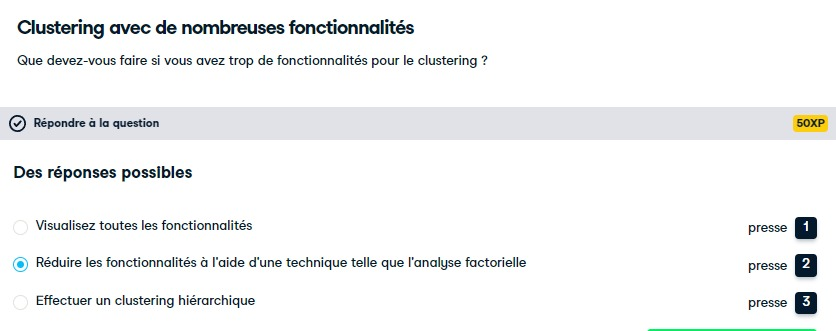

***Vous avez raison. Vous devriez explorer les étapes pour réduire le nombre de fonctionnalités.***

####**Vérifications de base sur les clusters**
+ ***Dans l'ensemble de données FIFA 18, nous nous sommes concentrés sur les défenseurs lors des exercices précédents. Essayons de nous concentrer sur les attributs offensifs d'un joueur. Le rythme ( pac), le dribble ( dri) et le tir ( sho) sont des fonctionnalités présentes chez les joueurs à l'esprit d'attaque. Dans cet exercice, le clustering k-means a déjà été appliqué sur les données en utilisant les valeurs mises à l'échelle de ces trois attributs. Essayez quelques vérifications de base sur les clusters ainsi formés.***

+ *Les données sont stockées dans un pandas DataFrame, fifa. Les noms de colonne mis à l'échelle sont présents dans une liste scaled_features. Les étiquettes de cluster sont stockées dans la colonne cluster_labels. Rappelez-vous que les méthodes .count() et .mean() dans les pandas vous aident à trouver le nombre d'observations et la moyenne des observations dans un DataFrame.*

####**Instructions**

+ Imprimer la taille des clusters en regroupant la colonne cluster_labels.
+ Imprimez les valeurs moyennes des salaires des joueurs dans chaque groupe. eur_wage est le nom de la colonne qui stocke le salaire d'un joueur en euros.

In [60]:
fifa = pd.read_csv('fifa_18_sample_data.csv')
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


In [61]:
fifa['scaled_pac'] = whiten(fifa['pac'])
fifa['scaled_dri'] = whiten(fifa['dri'])
fifa['scaled_sho'] = whiten(fifa['sho'])

In [62]:
from scipy.cluster.vq import vq

cluster_centers, _ = kmeans(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], 3)

fifa['cluster_labels'], _ = vq(fifa[['scaled_pac', 'scaled_dri', 'scaled_sho']], cluster_centers)

In [63]:
# Print the size of the clusters
print(fifa.groupby('cluster_labels')['ID'].count())

# Print the mean value of wages in each cluster
print(fifa.groupby('cluster_labels')['eur_wage'].mean())

cluster_labels
0    186
1    368
2    446
Name: ID, dtype: int64
cluster_labels
0    63623.655914
1    62630.434783
2    77466.367713
Name: eur_wage, dtype: float64


***Vous avez raison! Dans cet exemple, les tailles des grappes ne sont pas très différentes et aucune différence significative n'est visible dans les salaires. Une analyse plus approfondie est nécessaire pour valider ces grappes.***

####**FIFA 18 : qu'est-ce qui fait un joueur complet ?**

+ ***Le niveau global d'un joueur dans FIFA 18 est défini par six caractéristiques : allure (pac), tir (sho), passes (pas), dribble (dri), défense (def), physique (phy).***

+ ***Voici un exemple de carte :**

<img src = "https://media.contentapi.ea.com/content/dam/ea/easports/fifa/features/2017/top100-ratings/10-1/fut18-top100-hazard-lg.jpg"/>

+ ***Carte de joueur Eden Hazard***

+ ***Dans cet exercice, vous utiliserez les six caractéristiques pour créer des clusters. Les données de cet exercice sont stockées dans un pandas DataFrame, fifa. featuresest la liste de ces noms de colonne et scaled_featuresest la liste des colonnes qui contient leurs valeurs mises à l'échelle. Les éléments suivants ont été préchargés : kmeans, vq de scipy.cluster.vq, matplotlib.pyplot en tant que plt, seaborn en tant que sns.***

+ *Avant de commencer l'exercice, vous souhaiterez peut-être explorer scaled_features dans le shell IPython pour consulter la liste des six noms de colonnes mis à l'échelle.*

####**Consignes**

+ Utilisez l'algorithme kmeans() pour créer 2 clusters en utilisant la liste des colonnes, scaled_features.

+ Attribuez des étiquettes de cluster à chaque ligne en utilisant vq() et imprimez les centres de cluster en utilisant scaled_features la méthode .mean() des pandas.

+ Tracez un graphique à barres des attributs mis à l'échelle de chaque centre de cluster en utilisant la méthode .plot() des pandas.

+ Imprimez les noms des 5 premiers joueurs de chaque groupe, en utilisant la colonne name.


In [65]:
fifa['scaled_def'] = whiten(fifa['def'])
fifa['scaled_phy'] = whiten(fifa['phy'])
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pac', 'scaled_dri', 'scaled_def', 'scaled_phy']

In [66]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa['cluster_labels'], _ = vq(fifa[scaled_features], cluster_centers)
print(fifa.groupby('cluster_labels')[scaled_features].mean())

                scaled_pac  scaled_sho  scaled_pac  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 5.472701    3.983154    5.472701    7.039844    3.859591   
1                 6.823862    5.467795    6.823862    8.574124    2.382079   

                scaled_phy  
cluster_labels              
0                 9.117722  
1                 8.279279  


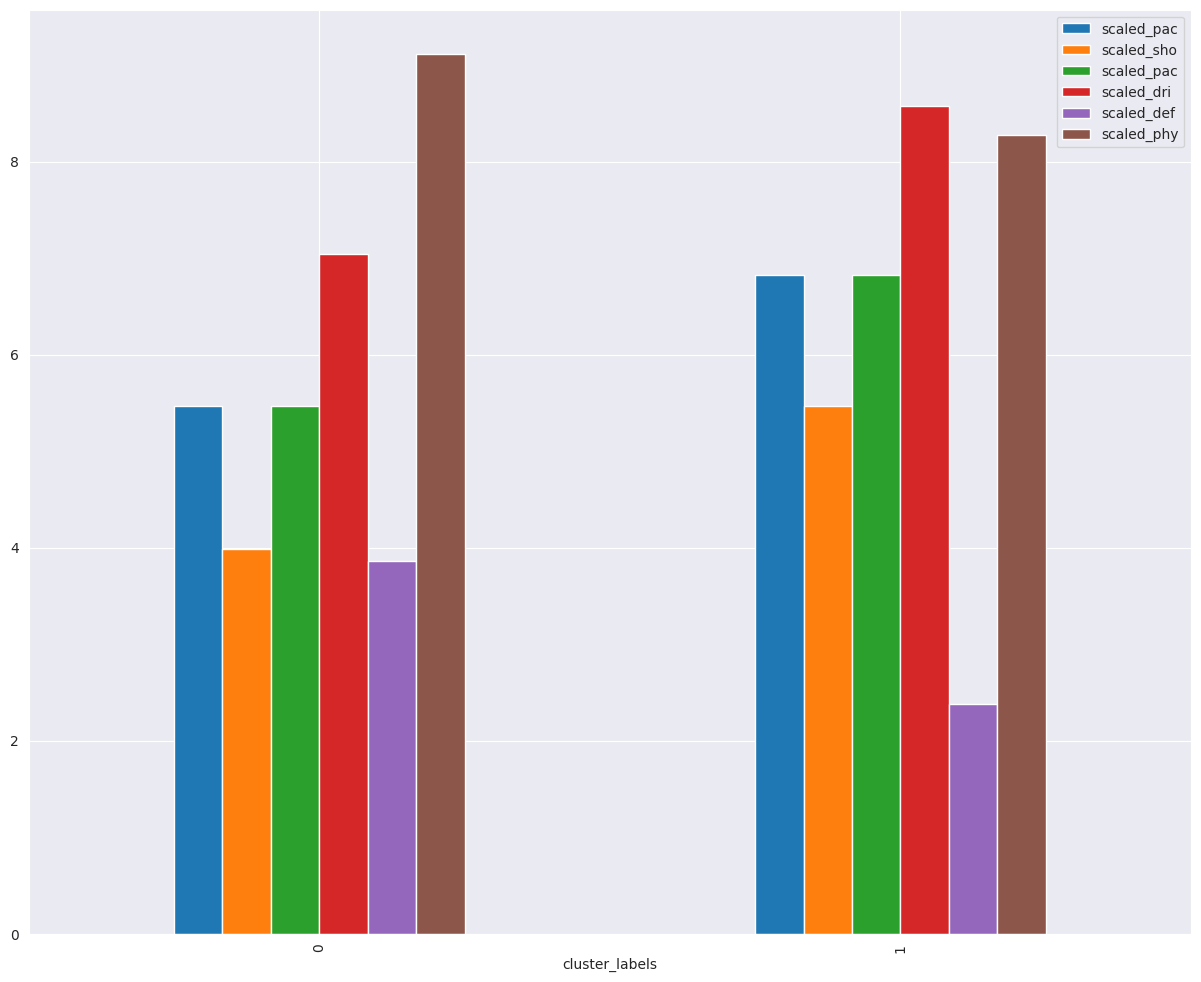

In [68]:
# Plot cluster centers to visualize clusters
fifa.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar', figsize=(15,12))
plt.show()

In [69]:
# Get the name column of first 5 players in each cluster
for cluster in fifa['cluster_labels'].unique():
    print(cluster, fifa[fifa['cluster_labels'] == cluster]['name'].values[:5])

1 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
0 ['T. Kroos' 'Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng']


***C'est exact ! Les données ont été triées avant que vous n'ayez effectué le regroupement. Notez que les meilleurs joueurs de chaque groupe sont représentatifs des caractéristiques globales du groupe - l'un des groupes représente principalement les attaquants, tandis que l'autre représente les défenseurs. Étonnamment, un gardien de but de haut niveau, Manuel Neuer, est vu dans le groupe des attaquants, mais il est connu pour sortir des sentiers battus et participer au jeu ouvert, ce qui se reflète dans ses attributs FIFA 18.***